### ¿Geopandas?

Geopandas enables the use and manipulation of geospatial data in Python. It extends the common datatype used in pandas to allow for the many and unique geometric operations: GeoSeries and GeoDataFrame. Geopandas is also built on top of shapely for its geometric operation; its underlying datatype allows Geopandas to run blazingly fast and is appropriate for many machine learning pipelines that require large geospatial datasets.

### Instalation 

Following steps:

#### 1. create new environment

conda creare -name new_env

#### 2. Activate new environment
conda activate new_env

#### 3. Install package 

conda install -c conda-forge geopandas

### Geopandas data types

Shapefile (.shp): vector data that stores geospatial information such as topology, shape geometry, coordinate etc

GeoJSON (.geojson): geospatial information and relevant characteristics (object or string)

Finally, Geopandas creates an additional geometry column


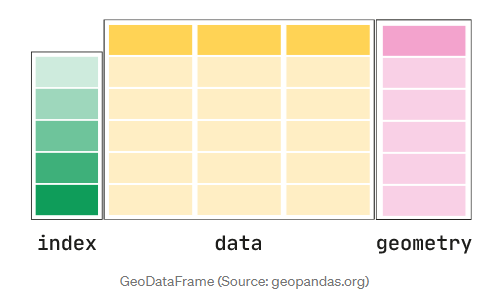


### Coordinate Reference Systems (crs)

The coordinate reference systems tell us how GeodataFrame o GeoSeries relate to places on Earth

#### relevant operations: setting a projection and re-projecting 

setting projection: geopandas.read_file() most of time includes projection information. Check using "Geoseries.crs"
If GeoDataframe does not include projection, hence use data["geometry"].set_crs(epsg=4326) for WGS-84.

### WGS-84: 
The Global Positioning System uses the World Geodetic System (WGS84) as its reference coordinate system. It's made up of a reference ellipsoid, a standard coordinate system, altitude data, and a geoid

### Reprojecting:

In somes cases, due to distortions in bidimensional plane and your application of geospatial data, re-projection is required. 

A commonly used default is Universal Transverse Mercator (UTM)







In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [34]:
# objects from Geopandas 

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString

import warnings
warnings.filterwarnings('ignore') # eliminar warning messages 

In [4]:
# chardet permite reconocer el formato del texto dentro del archiv .csv

base = open(r'../data/geopandas_data/Datos_panel_distritos.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'utf-8'

## Covid Data

In [6]:
# Import csv file from panel covid information at distric level
# Panel data from march-2020 to first two wees of january-2022

cv_data = pd.read_csv(r'../data/geopandas_data/Datos_panel_distritos.csv', encoding = charenc)
cv_data.head( 5 )

Código Departamento    Provincia     Distrito  Mes   Año  Casos  \
0   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    3  2020      0   
1   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    4  2020     47   
2   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    5  2020    165   
3   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    6  2020    119   
4   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    7  2020    175   

   Muertes Covid  Muertes totales  
0              0               16  
1              0                5  
2              3               11  
3              2               15  
4              2                8

In [11]:
cv_data.dtypes

Código              int64
Departamento       object
Provincia          object
Distrito           object
Mes                 int64
Año                 int64
Casos               int64
Muertes Covid       int64
Muertes totales     int64
dtype: object

In [7]:
# rename variable to merge later 
cv_data.rename({'Código':'UBIGEO'}, axis =1 , inplace = True)
cv_data.head( 5 )

UBIGEO Departamento    Provincia     Distrito  Mes   Año  Casos  \
0   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    3  2020      0   
1   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    4  2020     47   
2   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    5  2020    165   
3   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    6  2020    119   
4   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    7  2020    175   

   Muertes Covid  Muertes totales  
0              0               16  
1              0                5  
2              3               11  
3              2               15  
4              2                8

## Public Health Centers Data

In [9]:
# import csv file of public health centers: MINSA, ESSALUD and Regional Goverment
# coordinates information (NORTE: longitud) (ESTE: latitud)

health_centers = pd.read_csv(r'../data/geopandas_data/centros_hospitalarios.csv')
health_centers.head( 5 )

# Latitud (Y) ;  Longitud (X)

Institución  Código Único  Nombre del establecimiento  \
0  GOBIERNO REGIONAL          2076                   SAN PABLO   
1            ESSALUD         20628       POSTA MEDICA NEGRITOS   
2  GOBIERNO REGIONAL          2075                    NEGRITOS   
3  GOBIERNO REGIONAL          2077                     LOBITOS   
4            ESSALUD         12243  HOSPITAL II ESSALUD TALARA   

                               Clasificación  \
0         PUESTOS DE SALUD O POSTAS DE SALUD   
1         PUESTOS DE SALUD O POSTAS DE SALUD   
2         CENTROS DE SALUD O CENTROS MEDICOS   
3         PUESTOS DE SALUD O POSTAS DE SALUD   
4  HOSPITALES O CLINICAS DE ATENCION GENERAL   

                                         Tipo Departamento Provincia Distrito  \
0  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
1  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
2  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
3  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LOBITOS   
4  ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA    TALARA  PARIÑAS   

   UBIGEO                                 Dirección  ...    Estado  Situación  \
0  200703                   LAMBAYEQUE S/N NEGRITOS  ...  ACTIVADO              
1  200703        AVENIDA SAN MARTIN Nº 100 NEGRITOS  ...  ACTIVADO              
2  200703              URB. SUD AMERICA D-14 TALARA  ...  ACTIVADO              
3  200704           BARRIO PRIMAVERA A- 100 LOBITOS  ...  ACTIVADO              
4  200701  AV. PANAMERICANA S/N CARRETERA A LOBITOS  ...  ACTIVADO              

           Condición Inspección      NORTE      ESTE  COTA CAMAS code1 code2  
0  EN FUNCIONAMIENTO            -81.310632 -4.665043  15.3   NaN    19     1  
1  EN FUNCIONAMIENTO            -81.306508 -4.654384  20.4   NaN    19     1  
2  EN FUNCIONAMIENTO            -81.303974 -4.658634  41.6   NaN     4     1  
3  EN FUNCIONAMIENTO            -81.275139 -4.456625  39.4   NaN    19     1  
4  EN FUNCIONAMIENTO            -81.273840 -4.568419  28.7  35.0    12     3  

[5 rows x 35 columns]

In [11]:
# We can see longitude cordinates

health_centers.NORTE 

0      -81.310632
1      -81.306508
2      -81.303974
3      -81.275139
4      -81.273840
          ...    
8459          NaN
8460          NaN
8461          NaN
8462          NaN
8463          NaN
Name: NORTE, Length: 8464, dtype: float64

In [12]:
# DataFrame to GeoDataFrame

Public_health = gpd.GeoDataFrame( health_centers, geometry=gpd.points_from_xy( health_centers.NORTE, health_centers.ESTE ) )
Public_health.head( 5 )

Institución  Código Único  Nombre del establecimiento  \
0  GOBIERNO REGIONAL          2076                   SAN PABLO   
1            ESSALUD         20628       POSTA MEDICA NEGRITOS   
2  GOBIERNO REGIONAL          2075                    NEGRITOS   
3  GOBIERNO REGIONAL          2077                     LOBITOS   
4            ESSALUD         12243  HOSPITAL II ESSALUD TALARA   

                               Clasificación  \
0         PUESTOS DE SALUD O POSTAS DE SALUD   
1         PUESTOS DE SALUD O POSTAS DE SALUD   
2         CENTROS DE SALUD O CENTROS MEDICOS   
3         PUESTOS DE SALUD O POSTAS DE SALUD   
4  HOSPITALES O CLINICAS DE ATENCION GENERAL   

                                         Tipo Departamento Provincia Distrito  \
0  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
1  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
2  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LA BREA   
3  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO        PIURA    TALARA  LOBITOS   
4  ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA    TALARA  PARIÑAS   

   UBIGEO                                 Dirección  ...  Situación  \
0  200703                   LAMBAYEQUE S/N NEGRITOS  ...              
1  200703        AVENIDA SAN MARTIN Nº 100 NEGRITOS  ...              
2  200703              URB. SUD AMERICA D-14 TALARA  ...              
3  200704           BARRIO PRIMAVERA A- 100 LOBITOS  ...              
4  200701  AV. PANAMERICANA S/N CARRETERA A LOBITOS  ...              

           Condición  Inspección      NORTE      ESTE  COTA  CAMAS code1  \
0  EN FUNCIONAMIENTO             -81.310632 -4.665043  15.3    NaN    19   
1  EN FUNCIONAMIENTO             -81.306508 -4.654384  20.4    NaN    19   
2  EN FUNCIONAMIENTO             -81.303974 -4.658634  41.6    NaN     4   
3  EN FUNCIONAMIENTO             -81.275139 -4.456625  39.4    NaN    19   
4  EN FUNCIONAMIENTO             -81.273840 -4.568419  28.7   35.0    12   

  code2                    geometry  
0     1  POINT (-81.31063 -4.66504)  
1     1  POINT (-81.30651 -4.65438)  
2     1  POINT (-81.30397 -4.65863)  
3     1  POINT (-81.27514 -4.45663)  
4     3  POINT (-81.27384 -4.56842)  

[5 rows x 36 columns]

## Types and classification public centers

#### We focus on Postas médicas and Hospitales

#### code2 (Type)

ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO:			1

SERVICIO MÉDICO DE APOYO:			                2

ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO:			3


#### code1 (Clasification)

ATENCION PRE HOSPITALARIA:	1

CENTROS DE ATENCION PARA DEPENDIENTES A SUSTANCIAS PSICOACTIVAS Y OTRAS DEPENDENCIAS:	2

CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO:	3

CENTROS DE SALUD O CENTROS MEDICOS:	4

CENTROS DE SALUD O CENTROS MEDICOS,CENTROS DE SALUD O CENTROS MEDICOS:	5

CENTROS DE VACUNACION:	6

CENTROS MEDICOS ESPECIALIZADOS:	7

CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES DE LA SALUD:	8

ESTABLECIMIENTOS DE RECUPERACION O REPOSO:	9

HEMODIALISIS:	10

HOSPITALES O CLINICAS DE ATENCION ESPECIALIZADA:	11

HOSPITALES O CLINICAS DE ATENCION GENERAL:	12

INSTITUTOS DE SALUD ESPECIALIZADOS:	13

MEDICINA FISICA,REHABILITACION:	14

PATOLOGIA CLINICA:	15

PATOLOGIA CLINICA,ANATOMIA PATOLOGICA:	16

PATOLOGIA CLINICA,DIAGNOSTICO POR IMAGENES:	17

POLICLINICOS:	18

PUESTOS DE SALUD O POSTAS DE SALUD:	19

PUESTOS DE SALUD O POSTAS DE SALUD,PUESTOS DE SALUD O POSTAS DE SALUD:	19

SERVICIO DE TRASLADO DE PACIENTES:	20

SERVICIO DE TRASLADO DE PACIENTES,ATENCION DOMICILIARIA:	21

SERVICIO DE TRASLADO DE PACIENTES,ATENCION DOMICILIARIA,ATENCION PRE HOSPITALARIA:	22

SERVICIO DE TRASLADO DE PACIENTES,ATENCION PRE HOSPITALARIA:	23

CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO:	24


In [13]:
# code1 = 19 to postas médicas 
# code1 = 12 & 24 to Hospitals

Public_health1 = Public_health[Public_health.code1 == "19"]

Public_health2 = Public_health[(Public_health.code1 == "12") | (Public_health.code1 == "24")]
Public_health2.head( 5 )

Institución  Código Único              Nombre del establecimiento  \
4             ESSALUD         12243              HOSPITAL II ESSALUD TALARA   
5   GOBIERNO REGIONAL          2074                               TALARA II   
19            ESSALUD         11763  HOSPITAL I MIGUEL CRUZADO VERA - PAITA   
20  GOBIERNO REGIONAL          2021            HOSPITAL  LAS MERCEDES-PAITA   
23  GOBIERNO REGIONAL          2026                   PUEBLO NUEVO DE COLAN   

                                  Clasificación  \
4     HOSPITALES O CLINICAS DE ATENCION GENERAL   
5   CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO   
19  CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO   
20    HOSPITALES O CLINICAS DE ATENCION GENERAL   
23  CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO   

                                          Tipo Departamento Provincia  \
4   ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA    TALARA   
5   ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA    TALARA   
19  ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA     PAITA   
20  ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA     PAITA   
23  ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO        PIURA     PAITA   

   Distrito  UBIGEO                                 Dirección  ...  Situación  \
4   PARIÑAS  200701  AV. PANAMERICANA S/N CARRETERA A LOBITOS  ...              
5   PARIÑAS  200701  AVENIDA GRAU S/N EXPOLICLINICO PETROPERU  ...              
19    PAITA  200501            CARRETERA PAITA - PIURA KM 1.5  ...              
20    PAITA  200501               LOS PESCADORES S/N LA PUNTA  ...              
23    COLAN  200504                    JR. ALFONSO UGARTE S/N  ...              

            Condición  Inspección      NORTE      ESTE  COTA  CAMAS code1  \
4   EN FUNCIONAMIENTO             -81.273840 -4.568419  28.7   35.0    12   
5   EN FUNCIONAMIENTO             -81.272096 -4.578829  21.1    NaN    24   
19  EN FUNCIONAMIENTO             -81.100243 -5.087583  75.9   12.0    24   
20  EN FUNCIONAMIENTO             -81.091531 -5.090815  78.3   79.0    12   
23  EN FUNCIONAMIENTO             -81.058005 -4.911551  16.6    NaN    24   

   code2                    geometry  
4      3  POINT (-81.27384 -4.56842)  
5      3  POINT (-81.27210 -4.57883)  
19     3  POINT (-81.10024 -5.08758)  
20     3  POINT (-81.09153 -5.09081)  
23     3  POINT (-81.05801 -4.91155)  

[5 rows x 36 columns]

## Shape File

In [14]:
# Upload shape file at district level

maps = gpd.read_file(r'../data/geopandas_data/shape_file/DISTRITOS.shp')


In [15]:
maps.head(10)

IDDPTO DEPARTAMEN IDPROV         PROVINCIA  IDDIST                DISTRITO  \
0     10    HUANUCO   1009       PUERTO INCA  100902         CODO DEL POZUZO   
1     10    HUANUCO   1009       PUERTO INCA  100904             TOURNAVISTA   
2     25    UCAYALI   2503        PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3     25    UCAYALI   2503        PADRE ABAD  250302                 IRAZOLA   
4     25    UCAYALI   2503        PADRE ABAD  250304                 NESHUYA   
5     25    UCAYALI   2503        PADRE ABAD  250301              PADRE ABAD   
6     25    UCAYALI   2503        PADRE ABAD  250303                CURIMANA   
7     10    HUANUCO   1009       PUERTO INCA  100901             PUERTO INCA   
8     25    UCAYALI   2501  CORONEL PORTILLO  250106           NUEVA REQUENA   
9     25    UCAYALI   2501  CORONEL PORTILLO  250102              CAMPOVERDE   

                  CAPITAL CODCCPP  AREA FUENTE  \
0         CODO DEL POZUZO    0001     1   INEI   
1             TOURNAVISTA    0001     1   INEI   
2  ALEXANDER VON HUMBOLDT    0001     1   INEI   
3           SAN ALEJANDRO    0001     1   INEI   
4            MONTE ALEGRE    0001     1   INEI   
5                AGUAYTIA    0001     1   INEI   
6                CURIMANA    0001     1   INEI   
7             PUERTO INCA    0001     1   INEI   
8           NUEVA REQUENA    0001     1   INEI   
9             CAMPO VERDE    0001     1   INEI   

                                            geometry  
0  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...  
1  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...  
2  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...  
3  POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...  
4  POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...  
5  POLYGON ((-75.67827 -8.43830, -75.67668 -8.439...  
6  POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...  
7  POLYGON ((-74.81539 -9.03421, -74.81461 -9.035...  
8  POLYGON ((-75.01596 -7.96521, -75.00553 -7.970...  
9  POLYGON ((-74.77971 -8.25514, -74.77953 -8.255...

In [16]:
# Polygon by each district 

maps.geometry

0       POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...
1       POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...
2       POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...
3       POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...
4       POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...
                              ...                        
1868    POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...
1869    POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...
1870    POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...
1871    POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...
1872    POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...
Name: geometry, Length: 1873, dtype: geometry

In [17]:
maps = maps[['IDDIST', 'geometry']]
maps.rename({'IDDIST':'UBIGEO'}, axis =1, inplace = True )
maps 

UBIGEO                                           geometry
0     100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...
1     100904  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...
2     250305  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...
3     250302  POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...
4     250304  POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...
...      ...                                                ...
1868  100608  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...
1869  100609  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...
1870  100610  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...
1871  211105  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...
1872  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...

[1873 rows x 2 columns]

In [18]:
# UBIGEO from srting to int

maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

UBIGEO                                           geometry
0     100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...
1     100904  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...
2     250305  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...
3     250302  POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...
4     250304  POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...
...      ...                                                ...
1868  100608  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...
1869  100609  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...
1870  100610  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...
1871  211105  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...
1872  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...

[1873 rows x 2 columns]

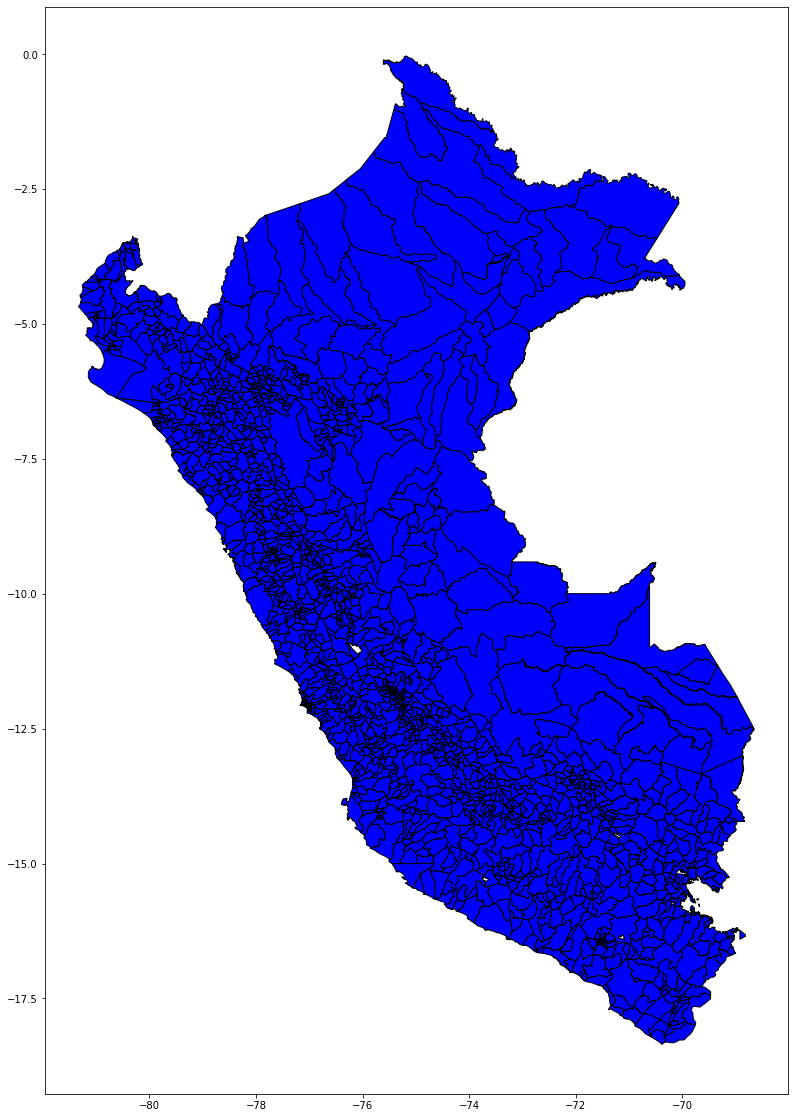

In [20]:
# Plot at district level 

fig, ax = plt.subplots(figsize=(20, 20))

maps.plot(  ax=ax, color='blue',
            edgecolor='black' )
plt.show()

## Merge: Covid Data & Shapefile

In [24]:
# Merge using inner way to drop missing values 

dataset_cv = pd.merge(maps, cv_data, how="left", on="UBIGEO")
dataset_cv

# cv_data información de casos de covid por distrito y (años y mes)

UBIGEO                                           geometry Departamento  \
0      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
1      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
2      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
3      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
4      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
...       ...                                                ...          ...   
40478  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   
40479  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   
40480  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   
40481  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   
40482  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   

         Provincia         Distrito   Mes     Año  Casos  Muertes Covid  \
0      PUERTO INCA  CODO DEL POZUZO   3.0  2020.0    0.0            0.0   
1      PUERTO INCA  CODO DEL POZUZO   4.0  2020.0    0.0            1.0   
2      PUERTO INCA  CODO DEL POZUZO   5.0  2020.0    1.0            0.0   
3      PUERTO INCA  CODO DEL POZUZO   6.0  2020.0    7.0            0.0   
4      PUERTO INCA  CODO DEL POZUZO   7.0  2020.0   11.0            1.0   
...            ...              ...   ...     ...    ...            ...   
40478       HUAURA           HUAURA   9.0  2021.0    9.0            0.0   
40479       HUAURA           HUAURA  10.0  2021.0   11.0            2.0   
40480       HUAURA           HUAURA  11.0  2021.0   28.0            1.0   
40481       HUAURA           HUAURA  12.0  2021.0   75.0            1.0   
40482       HUAURA           HUAURA   1.0  2022.0   39.0            0.0   

       Muertes totales  
0                  3.0  
1                  2.0  
2                  2.0  
3                  1.0  
4                  4.0  
...                ...  
40478             20.0  
40479             16.0  
40480             10.0  
40481             16.0  
40482              7.0  

[40483 rows x 10 columns]

In [25]:
# Function to filter dataset_covid by year, month and administrative space(province)

def subdata( a , b, c ):
    
    if c == "All-Peru":
        
        resultado = dataset_cv.loc[(dataset_cv['Año']== a) & (dataset_cv['Mes']== b)]
    else:
        resultado = dataset_cv.loc[(dataset_cv['Año']== a) & (dataset_cv['Mes']== b) & (dataset_cv['Provincia']== c)]
    return resultado  


In [30]:
#Second wave 
base = subdata( 2021 , 8, "All-Peru")  # all peru Aug-2020

#Second wave
base_lima = subdata( 2021 , 8, "LIMA")  # Lima Aug-2020

## Plot covid infection at disctrict level 

<AxesSubplot:>

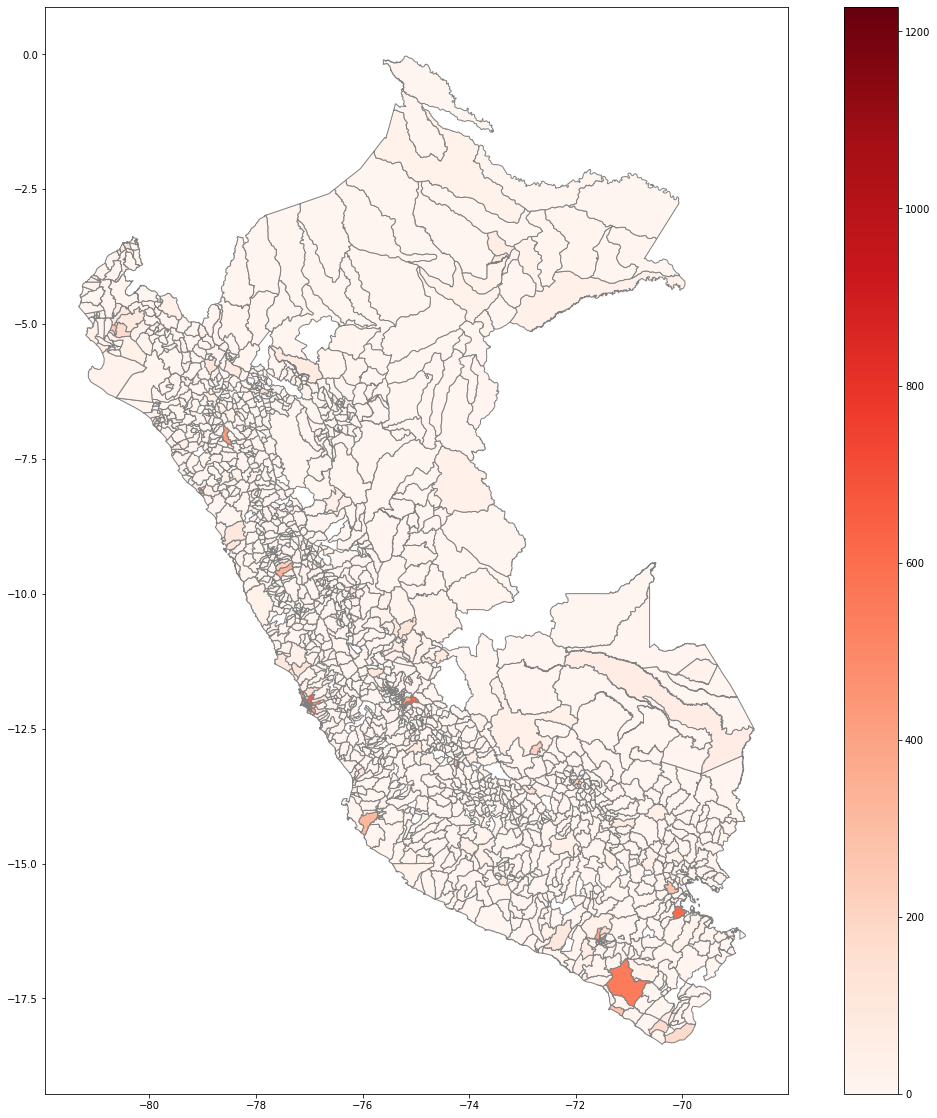

In [31]:
# Plot covid infection at disctrict level 

base.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
           missing_kwds= dict(color = "#DADADB"), 
          legend = True )

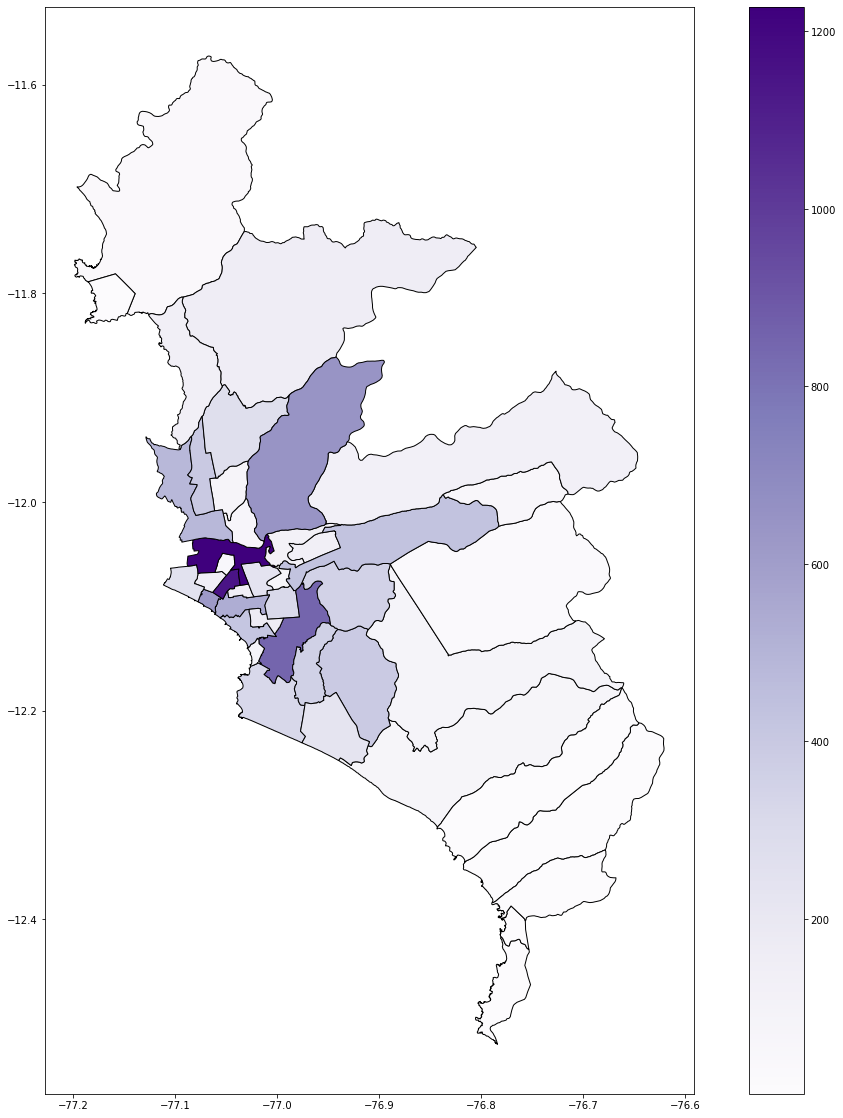

In [32]:
# Covid & Lima Matropolitana 

base_lima.plot(column='Casos', cmap='Purples', figsize=(20, 20),
                      edgecolor='black', 
                      legend = True)

# save map
plt.savefig(r'Lima_covid_Heatmap.png')

In [33]:
# Observamos el sitema de coordenadas (EPSG:4326)

base_lima.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Get Centroid

In [35]:
# Centroid 

base_lima['centroid'] = base_lima['geometry'].centroid

In [37]:
base_lima.head(10)

UBIGEO                                           geometry Departamento  \
8183   150119  POLYGON ((-76.70549 -12.17672, -76.70429 -12.1...         LIMA   
9133   150102  POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...         LIMA   
11737  150131  POLYGON ((-77.04859 -12.08504, -77.04762 -12.0...         LIMA   
11760  150120  POLYGON ((-77.07210 -12.08358, -77.06348 -12.0...         LIMA   
11784  150130  POLYGON ((-76.98732 -12.07994, -76.98425 -12.0...         LIMA   
11807  150116  POLYGON ((-77.02807 -12.07871, -77.02435 -12.0...         LIMA   
11830  150140  POLYGON ((-76.95923 -12.07576, -76.95831 -12.0...         LIMA   
11899  150121  POLYGON ((-77.04966 -12.07025, -77.05097 -12.0...         LIMA   
12428  150139  POLYGON ((-77.14355 -11.79587, -77.14061 -11.7...         LIMA   
15104  150106  POLYGON ((-76.89995 -11.72979, -76.89921 -11.7...         LIMA   

      Provincia           Distrito  Mes     Año  Casos  Muertes Covid  \
8183       LIMA              LURIN  8.0  2021.0   74.0            2.0   
9133       LIMA              ANCON  8.0  2021.0   35.0            4.0   
11737      LIMA         SAN ISIDRO  8.0  2021.0  530.0            5.0   
11760      LIMA  MAGDALENA DEL MAR  8.0  2021.0  624.0            0.0   
11784      LIMA          SAN BORJA  8.0  2021.0  316.0            9.0   
11807      LIMA              LINCE  8.0  2021.0  148.0            5.0   
11830      LIMA  SANTIAGO DE SURCO  8.0  2021.0  852.0           27.0   
11899      LIMA       PUEBLO LIBRE  8.0  2021.0  143.0            5.0   
12428      LIMA         SANTA ROSA  8.0  2021.0   10.0            0.0   
15104      LIMA         CARABAYLLO  8.0  2021.0  159.0           11.0   

       Muertes totales                     centroid  
8183              17.0  POINT (-76.80111 -12.23426)  
9133              23.0  POINT (-77.09581 -11.70253)  
11737             62.0  POINT (-77.03667 -12.09898)  
11760             44.0  POINT (-77.06669 -12.09384)  
11784             94.0  POINT (-76.99521 -12.09755)  
11807             73.0  POINT (-77.03567 -12.08579)  
11830            197.0  POINT (-76.98431 -12.12699)  
11899             70.0  POINT (-77.06574 -12.07508)  
12428              3.0  POINT (-77.16325 -11.80501)  
15104            116.0  POINT (-76.97293 -11.80738)

In [38]:
props = dict(boxstyle='round', facecolor = 'linen', alpha =1)
props

{'boxstyle': 'round', 'facecolor': 'linen', 'alpha': 1}

In [39]:
# check distric's name 
for point in base_lima.iterrows():
    print(point[1]['Distrito'])

LURIN
ANCON
SAN ISIDRO
MAGDALENA DEL MAR
SAN BORJA
LINCE
SANTIAGO DE SURCO
PUEBLO LIBRE
SANTA ROSA
CARABAYLLO
JESUS MARIA
PUCUSANA
SANTA MARIA DEL MAR
CHORRILLOS
BARRANCO
VILLA MARIA DEL TRIUNFO
SAN JUAN DE MIRAFLORES
MIRAFLORES
SURQUILLO
PUNTA NEGRA
SAN LUIS
SAN MIGUEL
VILLA EL SALVADOR
PUNTA HERMOSA
SAN BARTOLO
PACHACAMAC
LA VICTORIA
LA MOLINA
BRE<d1>A
SANTA ANITA
CIENEGUILLA
LIMA
EL AGUSTINO
RIMAC
ATE
CHACLACAYO
INDEPENDENCIA
SAN MARTIN DE PORRES
LOS OLIVOS
COMAS
LURIGANCHO
SAN JUAN DE LURIGANCHO
PUENTE PIEDRA


## Add District Names in Centroid

<AxesSubplot:>

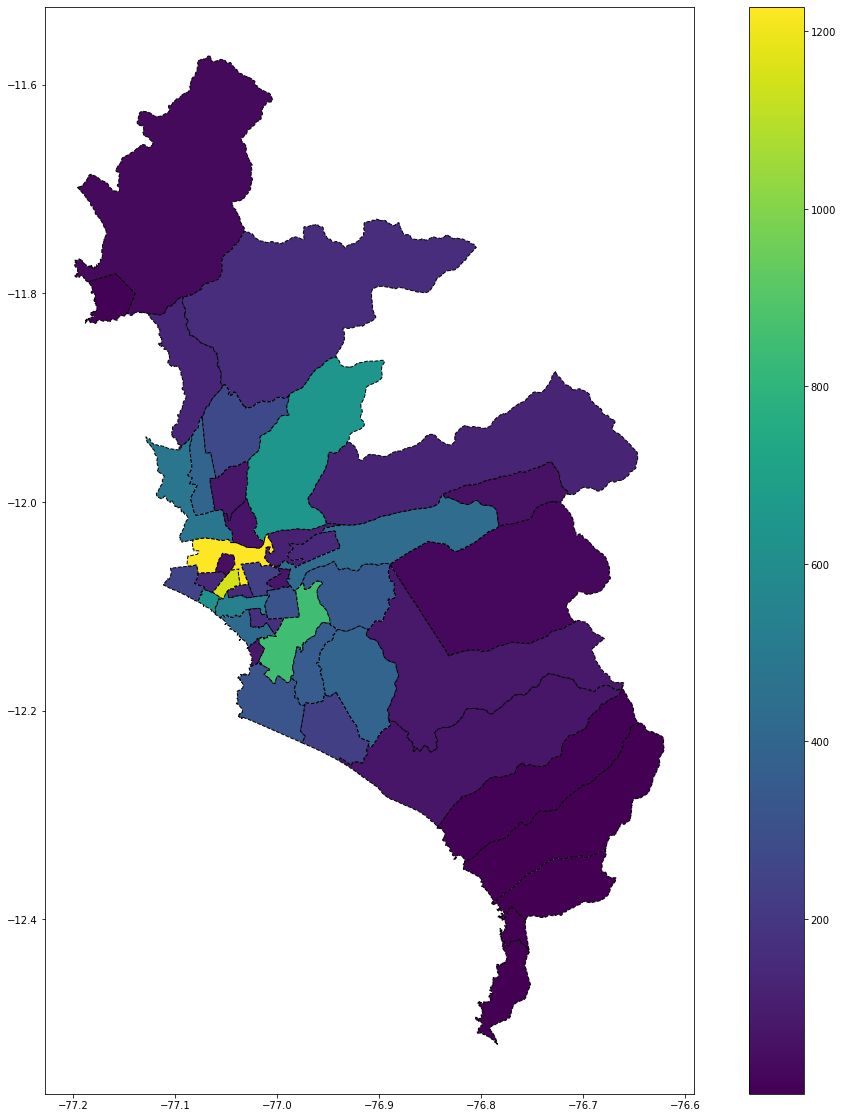

In [41]:
fig, ax = plt.subplots(figsize=(20, 20))

# Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='viridis', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

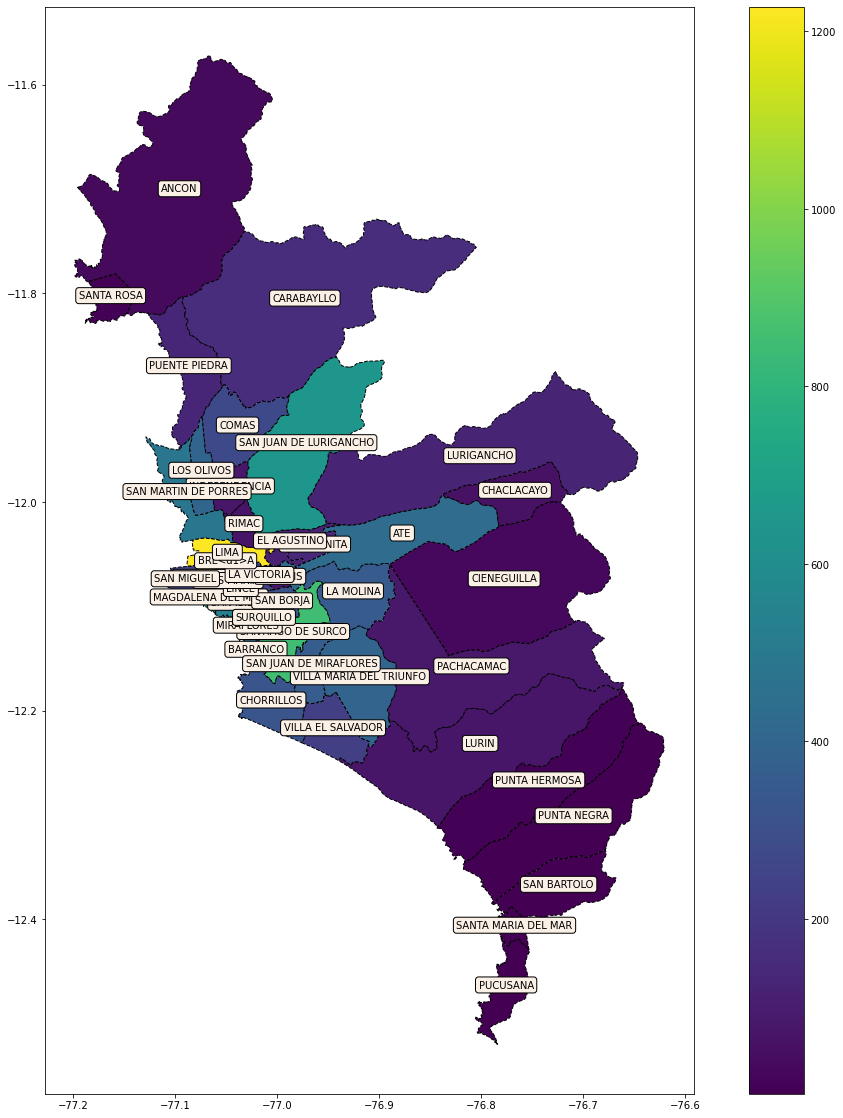

In [42]:
# Add text by district's name 

fig, ax = plt.subplots(figsize=(20, 20))

# Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='viridis', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

# add district name in litle box

props = dict(boxstyle='round', facecolor = 'linen', alpha =1)

for point in base_lima.iterrows():
        ax.text( point[1]['centroid'].x,
                 point[1]['centroid'].y,
                 point[1]['Distrito'],
                 horizontalalignment='center',
                 fontsize=10,
                 bbox=props )

#plt.savefig(r'Lima_covid_Heatmap_2.png')

<AxesSubplot:>

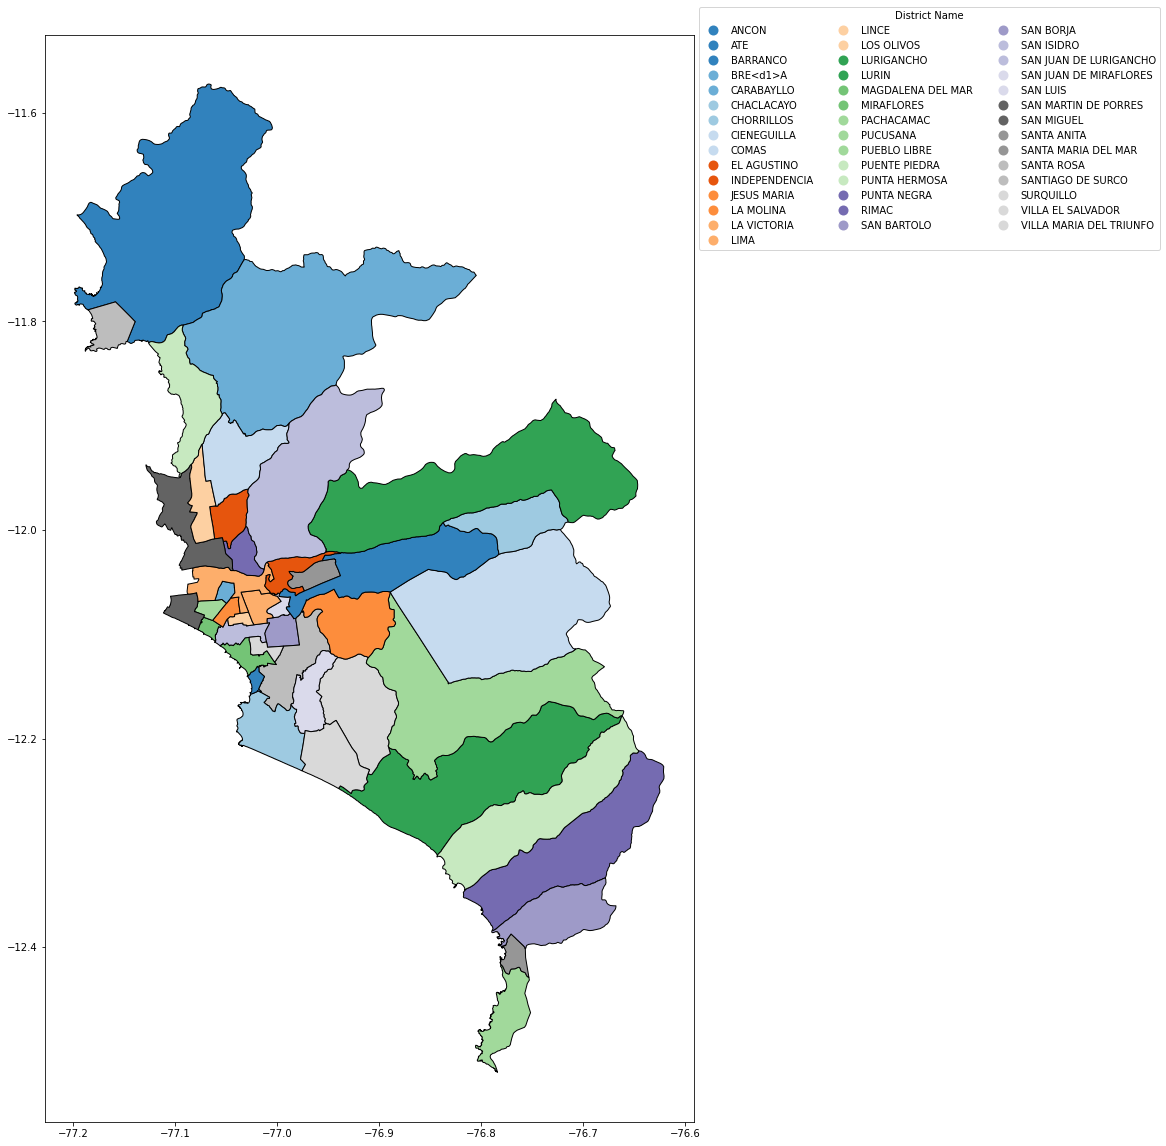

In [45]:
#Using legend by district 


# Customize legend 
leg_kwds={'title':'District Name',
          'loc': 'upper left',
          'bbox_to_anchor':(1, 1.03),
          'ncol':3}


base_lima.plot(column='Distrito', cmap='tab20c', figsize=(20, 20), legend = True, linestyle='-', 
               edgecolor='black',
               legend_kwds = leg_kwds)

In [46]:
# Postas Médicas and Hospitales públicos - LIMA

PH_lima_postas = Public_health1[Public_health1.Provincia == "LIMA"]

PH_lima_hospitales = Public_health2[Public_health2.Provincia == "LIMA"]
PH_lima_hospitales

Institución  Código Único  \
2715       MINSA          5814   
2803       MINSA          5816   
2832     ESSALUD          8564   
2852       MINSA          5817   
2859       MINSA          7632   
2862       MINSA          5799   
2875       MINSA          5821   
2879       MINSA          6196   
2887       MINSA          6214   
2904       MINSA          5772   
2905     ESSALUD          8671   
2912       MINSA          5755   
2927       MINSA          5791   
2943     ESSALUD          9188   
2955       MINSA          6207   
2984       MINSA          5644   
2988     ESSALUD          8502   
2997     ESSALUD          8489   
3009       MINSA          6162   
3017       MINSA          6178   
3023       MINSA          6175   
3027       MINSA          5991   
3036       MINSA          5735   
3040       MINSA          6206   
3048       MINSA          5842   
3071       MINSA          5998   
3077       MINSA          5617   
3093       MINSA          5966   
3096     ESSALUD          8317   
3161       MINSA          6750   
3164       MINSA          6104   
3175       MINSA          6107   
3204       MINSA          6152   
3213       MINSA          6132   
3214     ESSALUD         10135   
3216       MINSA          6153   
3217       MINSA          6133   
3230     ESSALUD         18580   
3238       MINSA          6151   
3255       MINSA          6164   
3262       MINSA          6124   
3269       MINSA          5945   
3284       MINSA          6141   
3322       MINSA          6079   
3363       MINSA          5883   
3370       MINSA          5978   
3382       MINSA          5938   
3508       MINSA          5947   
7909     ESSALUD          8318   

                             Nombre del establecimiento  \
2715             CENTRO DE SALUD MATERNO INFANTIL ANCON   
2803         MATERNO INFANTIL DR. ENRIQUE MARTIN ALTUNA   
2832                   HOSPITAL I OCTAVIO MONGRUT MUÑOZ   
2852                                         SANTA ROSA   
2859                   HOSPITAL CARLOS LANFRANCO LA HOZ   
2862                                 CLAS JUAN PABLO II   
2875                                        LOS SUREÑOS   
2879                                          MAGDALENA   
2887                      HOSPITAL VICTOR LARCO HERRERA   
2904           CENTRO MATERNO INFANTIL SANTA LUZMILA II   
2905                    HOSPITAL I MARINO MOLINA SCIPPA   
2912            CENTRO MATERNO INFANTIL LAURA RODRIGUEZ   
2927                                 TAHUANTINSUYO BAJO   
2943                         HOSPITAL II RAMÓN CASTILLA   
2955                          NACIONAL ARZOBISPO LOAYZA   
2984                                              RIMAC   
2988                      HOSPITAL III EMERGENCIAS GRAU   
2997               ESSALUD - HOSPITAL II SUÁREZ ANGAMOS   
3009  CENTRO DE EMERGENCIAS SAN PEDRO DE LOS CHORRILLOS   
3017                          CENTRO DE SALUD SURQUILLO   
3023                                        EL PORVENIR   
3027  CENTRO MATERNO INFANTIL DE SALUD - "VIRGEN DEL...   
3036                                        EL PROGRESO   
3040                              NACIONAL  DOS DE MAYO   
3048                                        PIEDRA LIZA   
3071                              BUENOS AIRES DE VILLA   
3077                    HOSPITAL SAN JUAN DE LURIGANCHO   
3093                                       SAN FERNANDO   
3096                HOSPITAL AURELIO DIAZ UFANO Y PERAL   
3161                                        SANTA ANITA   
3164                                     MANUEL BARRETO   
3175                                           OLLANTAY   
3204                             JOSE CARLOS MARIATEGUI   
3213                   CENTRO MATERNO INFANTIL SAN JOSE   
3214            HOSPITAL I CARLOS ALCANTARA BUTTERFIELD   
3216                             DANIEL ALCIDES CARRION   
3217              CENTRO MATERNO INFANTIL JUAN PABLO II   
3230                     GUILLERMO KAELIN  DE LA FUENTE   
323

## Covid y Postas

In [47]:
PH_lima_postas

Institución  Código Único  \
2725       MINSA          5824   
2728       MINSA         14727   
2740       MINSA         16525   
2762       MINSA          5825   
2797       MINSA          5750   
...          ...           ...   
3486       MINSA          5868   
3516       MINSA          5870   
3519       MINSA          5867   
8125       MINSA          5940   
8184       MINSA         23635   

                             Nombre del establecimiento  \
2725                                           SAN JOSE   
2728                                             PROFAM   
2740                                    VILLAS DE ANCON   
2762                             VIRGEN DE LAS MERCEDES   
2797                                     CERRO LA REGLA   
...                                                 ...   
3486                              SEÑOR DE LOS MILAGROS   
3516                                       PABLO PATRON   
3519                                  MARISCAL CASTILLA   
8125                                           HUASCATA   
8184  RED DE SERVICIOS DE SALUD SAN JUAN DE MIRAFLOR...   

                           Clasificación  \
2725  PUESTOS DE SALUD O POSTAS DE SALUD   
2728  PUESTOS DE SALUD O POSTAS DE SALUD   
2740  PUESTOS DE SALUD O POSTAS DE SALUD   
2762  PUESTOS DE SALUD O POSTAS DE SALUD   
2797  PUESTOS DE SALUD O POSTAS DE SALUD   
...                                  ...   
3486  PUESTOS DE SALUD O POSTAS DE SALUD   
3516  PUESTOS DE SALUD O POSTAS DE SALUD   
3519  PUESTOS DE SALUD O POSTAS DE SALUD   
8125  PUESTOS DE SALUD O POSTAS DE SALUD   
8184  PUESTOS DE SALUD O POSTAS DE SALUD   

                                            Tipo Departamento Provincia  \
2725  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
2728  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
2740  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
2762  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
2797  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
...                                          ...          ...       ...   
3486  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
3516  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
3519  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
8125  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   
8184  ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO         LIMA      LIMA   

                  Distrito  UBIGEO  \
2725                 ANCON  150102   
2728            SANTA ROSA  150139   
2740                 ANCON  150102   
2762            SANTA ROSA  150139   
2797  SAN MARTIN DE PORRES  150135   
...                    ...     ...   
3486            LURIGANCHO  150118   
3516            LURIGANCHO  150118   
3519            LURIGANCHO  150118   
8125            CHACLACAYO  150107   
8184                  LIMA  150101   

                                              Dirección  ...  Situación  \
2725  ESQ. CALLE Nº 17 Y CALLE Nº 9 URB. DE INTERES ...  ...              
2728  AV. SANTA ROSA, MANZANA O-2 / ASOCIACION DE VI...  ...              
2740       MZ X ASOCIACION PRO-VIVIENDA VILLAS DE ANCON  ...              
2762                 ASOC. VIV. SANTA ROSA MZ. B LT. 09  ...              
2797              MZ B LT 11 - AAHH ESPERANZA, COMITÉ 2  ...              
...                                                 ...  ...        ...   
3486  AVENIDA AV.PRECURSORES S/N AAHH NICOLAS DE PIE...  ...              
3516  AAHH PABLO PATRON - CALLE 14 MZ. V LOTE 7 DIST...  ...              
3519  CALLE SANTA ROSA MZ O S/N - AAHH MARISCAL CAST...  ...              
8125  OTROS MZ N LOTE 05 AAHH CERRO VECINO HUASCATA-...  ...              
8184  OTROS AA.HH. Virgen del Guadalupe MANZANA E LO...  ...              

              Condición  Inspección      NORTE       ESTE   COTA  CAMAS code1  \
2725  EN FUNCIONAM

<AxesSubplot:>

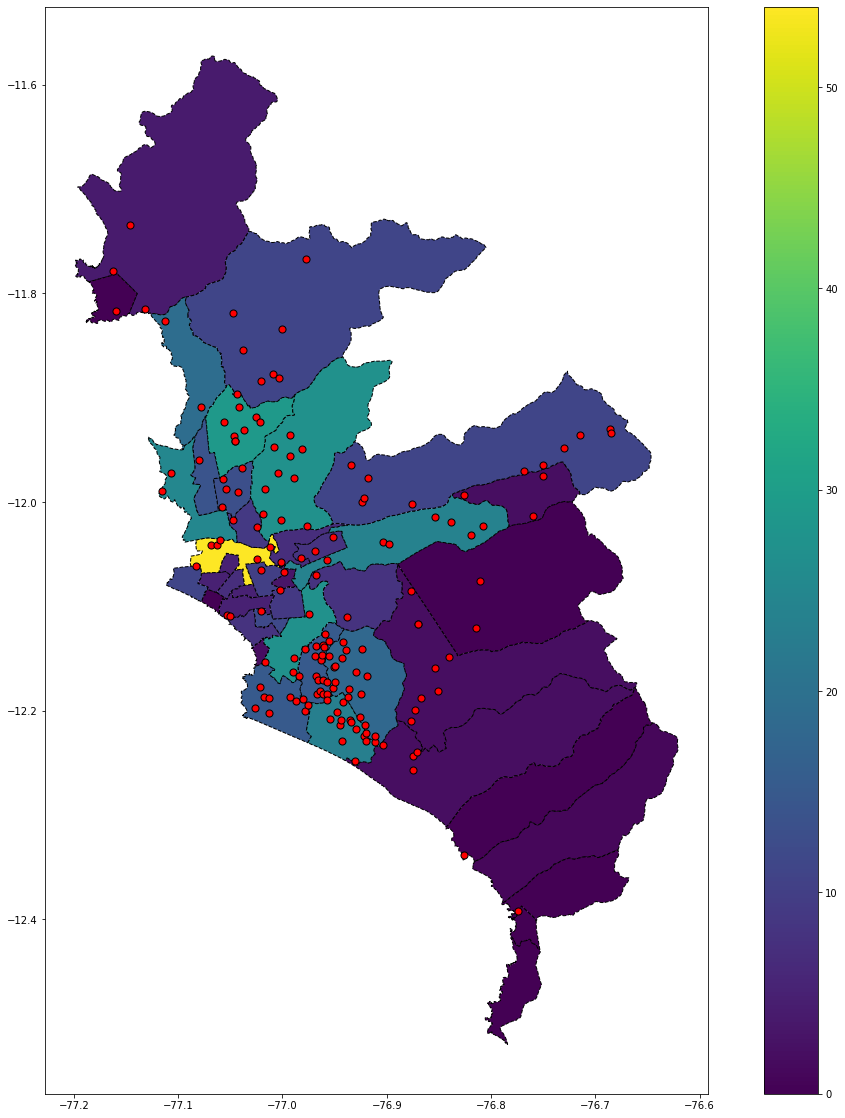

In [51]:
# Covid deaths and Postas médicas 

fig, ax = plt.subplots(figsize=(20, 20))

#Heatmap Lima and Covid infection

base_lima.plot( column='Muertes Covid', 
               cmap='viridis', 
               linestyle='--',
               edgecolor='black', 
               legend = True, 
               ax=ax )

PH_lima_postas.plot(ax = ax, color = 'red', markersize=50, edgecolor='black')

## Hospitales Públicos y Postas Médicas

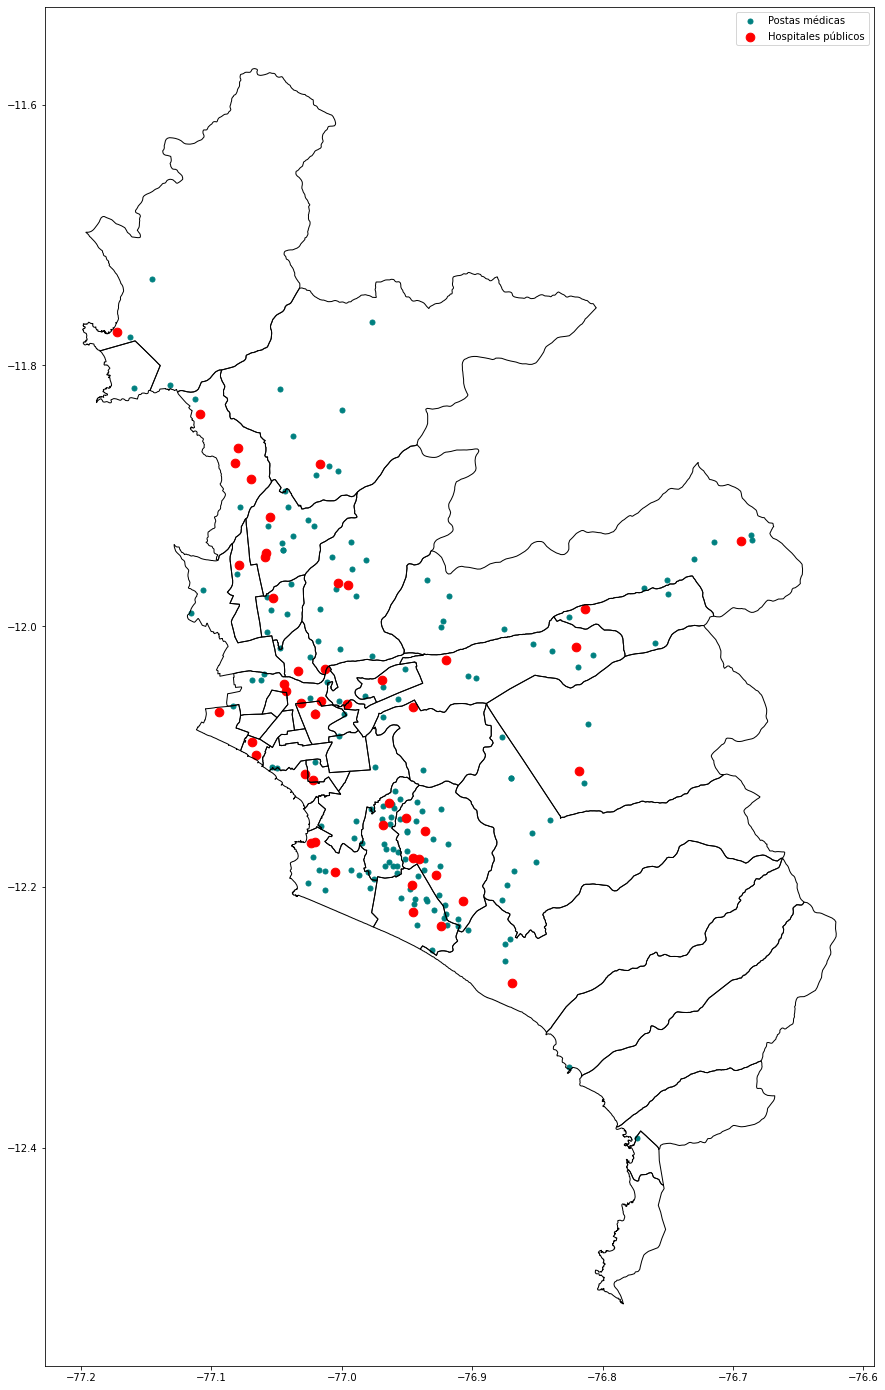

In [52]:
# Plot de Postas anh Hospital 

ax = base_lima.plot(figsize=(25, 25), color='none', edgecolor='black', zorder=3)

PH_lima_postas.plot(color='teal', label = "Postas médicas", markersize=25, ax=ax)
PH_lima_hospitales.plot(color='red', label = "Hospitales públicos", markersize=75, ax=ax)

plt.legend(loc='upper right')

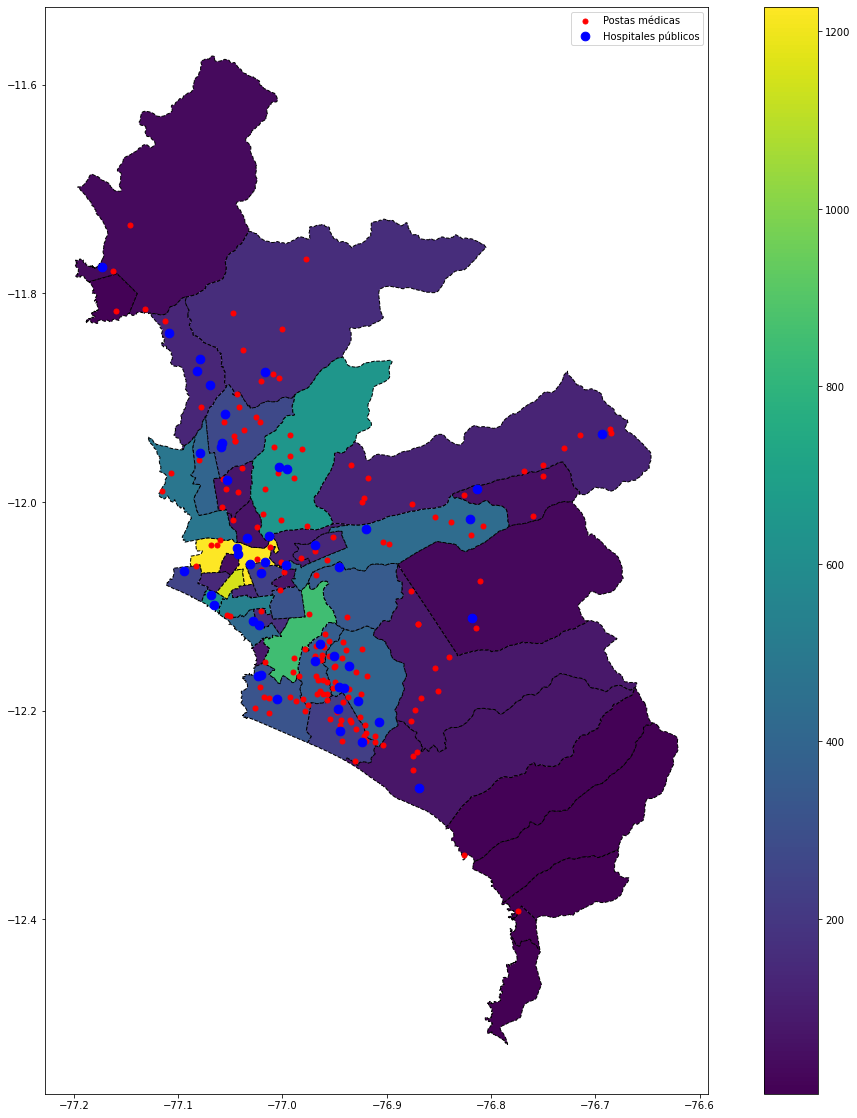

In [54]:
# Covid infection and Postas médicas 

fig, ax = plt.subplots(figsize=(20, 20))

#Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='viridis', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

PH_lima_postas.plot(color='red', label = "Postas médicas", markersize=25, ax=ax)
PH_lima_hospitales.plot(color='blue', label = "Hospitales públicos", markersize=75, ax=ax)

plt.legend(loc='upper right')

## Relative Size of Markers from panda series

In [56]:
# drop raws with nan values 

PH_lima_hospitales = PH_lima_hospitales.dropna(subset=['CAMAS'])

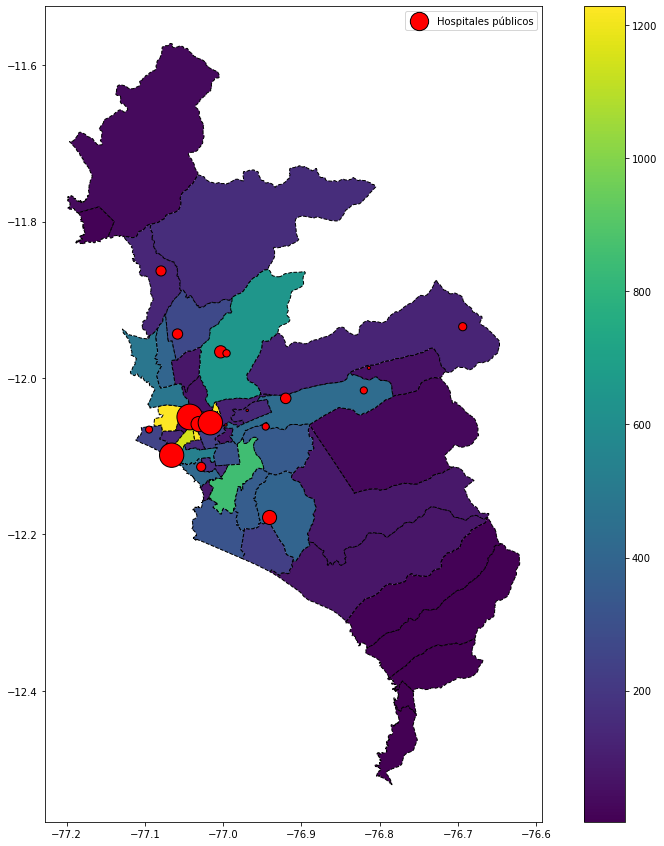

In [58]:
# Covid infection and Public Hospital by number of beds 

fig, ax = plt.subplots(figsize=(15, 15))

markersize=PH_lima_hospitales['CAMAS']

#Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='viridis', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

PH_lima_hospitales.plot( ax=ax, color='red', label = "Hospitales públicos", markersize = markersize,
                       edgecolor='black')
plt.legend(loc='upper right')

<AxesSubplot:>

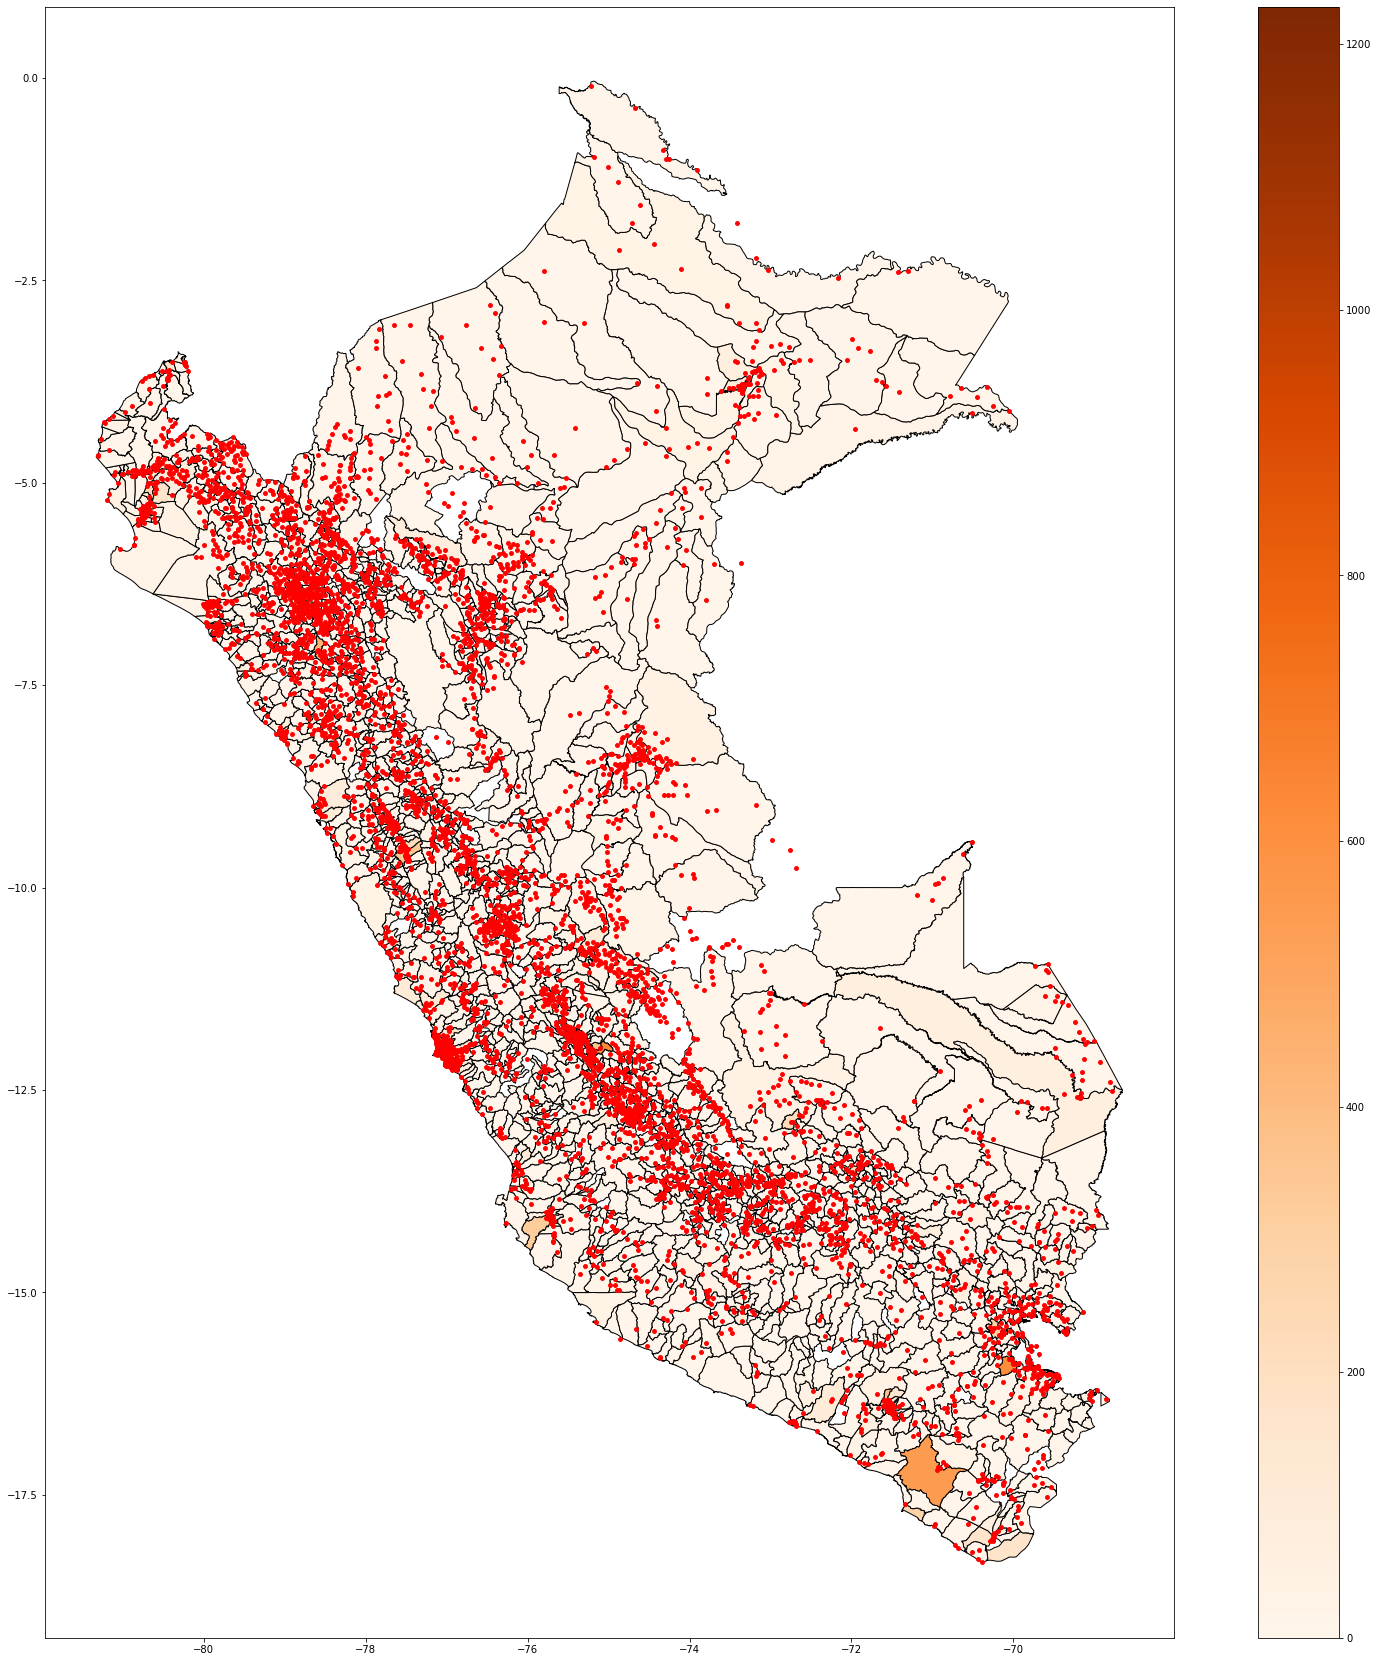

In [59]:
# Covid infection & postas médicas at the national level 

gf = base.plot(column='Casos', cmap='Oranges', 
          figsize=(30, 30),
          linestyle='-',
          edgecolor='black',
          legend = True)

Public_health1.plot(ax = gf, color = 'red', markersize=15)

## Select Districts

In [60]:
# districs name as a index
base_lima = base_lima.set_index("Distrito")

In [61]:
base_lima.head(20)

UBIGEO  \
Distrito                          
LURIN                    150119   
ANCON                    150102   
SAN ISIDRO               150131   
MAGDALENA DEL MAR        150120   
SAN BORJA                150130   
LINCE                    150116   
SANTIAGO DE SURCO        150140   
PUEBLO LIBRE             150121   
SANTA ROSA               150139   
CARABAYLLO               150106   
JESUS MARIA              150113   
PUCUSANA                 150124   
SANTA MARIA DEL MAR      150138   
CHORRILLOS               150108   
BARRANCO                 150104   
VILLA MARIA DEL TRIUNFO  150143   
SAN JUAN DE MIRAFLORES   150133   
MIRAFLORES               150122   
SURQUILLO                150141   
PUNTA NEGRA              150127   

                                                                  geometry  \
Distrito                                                                     
LURIN                    POLYGON ((-76.70549 -12.17672, -76.70429 -12.1...   
ANCON                    POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...   
SAN ISIDRO               POLYGON ((-77.04859 -12.08504, -77.04762 -12.0...   
MAGDALENA DEL MAR        POLYGON ((-77.07210 -12.08358, -77.06348 -12.0...   
SAN BORJA                POLYGON ((-76.98732 -12.07994, -76.98425 -12.0...   
LINCE                    POLYGON ((-77.02807 -12.07871, -77.02435 -12.0...   
SANTIAGO DE SURCO        POLYGON ((-76.95923 -12.07576, -76.95831 -12.0...   
PUEBLO LIBRE             POLYGON ((-77.04966 -12.07025, -77.05097 -12.0...   
SANTA ROSA               POLYGON ((-77.14355 -11.79587, -77.14061 -11.7...   
CARABAYLLO               POLYGON ((-76.89995 -11.72979, -76.89921 -11.7...   
JESUS MARIA              POLYGON ((-77.03811 -12.06768, -77.03629 -12.0...   
PUCUSANA                 POLYGON ((-76.77367 -12.42553, -76.77332 -12.4...   
SANTA MARIA DEL MAR      MULTIPOLYGON (((-76.78117 -12.40917, -76.78144...   
CHORRILLOS               POLYGON ((-77.00745 -12.16033, -77.00781 -12.1...   
BARRANCO                 POLYGON ((-77.01945 -12.13060, -77.01915 -12.1...   
VILLA MARIA DEL TRIUNFO  POLYGON ((-76.91078 -12.12233, -76.91191 -12.1...   
SAN JUAN DE MIRAFLORES   POLYGON ((-76.95434 -12.11556, -76.95416 -12.1...   
MIRAFLORES               POLYGON ((-77.02656 -12.10820, -77.02631 -12.1...   
SURQUILLO                POLYGON ((-77.01498 -12.10778, -77.01469 -12.1...   
PUNTA NEGRA              POLYGON ((-76.64078 -12.21377, -76.64000 -12.2...   

                        Departamento Provincia  Mes     Año   Casos  \
Distrito                                                              
LURIN                           LIMA      LIMA  8.0  2021.0    74.0   
ANCON                           LIMA      LIMA  8.0  2021.0    35.0   
SAN ISIDRO                      LIMA      LIMA  8.0  2021.0   530.0   
MAGDALENA DEL MAR               LIMA      LIMA  8.0  2021.0   624.0   
SAN BORJA                       LIMA      LIMA  8.0  2021.0   316.0   
LINCE                           LIMA      LIMA  8.0  2021.0   148.0   
SANTIAGO DE SURCO               LIMA      LIMA  8.0  2021.0   852.0   
PUEBLO LIBRE                    LIMA      LIMA  8.0  2021.0   143.0   
SANTA ROSA                      LIMA      LIMA  8.0  2021.0    10.0   
CARABAYLLO                      LIMA      LIMA  8.0  2021.0   159.0   
JESUS MARIA                     LIMA      LIMA  8.0  2021.0  1151.0   
PUCUSANA                        LIMA      LIMA  8.0  2021.0     5.0   
SANTA MARIA DEL MAR             LIMA      LIMA  8.0  2021.0     3.0   
CHORRILLOS                      LIMA      LIMA  8.0  2021.0   319.0   
BARRANCO                        LIMA      LIMA  8.0  2021.0    81.0   
VILLA MARIA DEL TRIUNFO         LIMA      LIMA  8.0  2021.0   392.0   
SAN JUAN DE MIRAFLORES          LIMA      LIMA  8.0  2021.0   361.0   
MIRAFLORES                      LIMA      LIMA  8.0  2021.0   415.0   
SURQUILLO                       LIMA      LIMA  8.0  2021.0   170.0   
PUNTA NEGRA                     LIMA      LIMA

<AxesSubplot:>

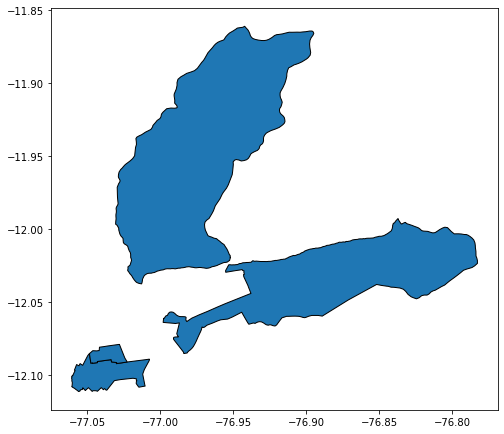

In [64]:
#Plot selectec districs 

ATE = base_lima.loc["ATE", "geometry"]
SJL = base_lima.loc["SAN JUAN DE LURIGANCHO", "geometry"]
SI = base_lima.loc["SAN ISIDRO", "geometry"]
LC = base_lima.loc["LINCE", "geometry"]

gpd.GeoSeries([ATE,SJL,SI,LC]).plot(figsize=(8, 8),linestyle='-',
                                    edgecolor='black')

## Limits - Boarders

In [65]:
# Logic operations:

# Lince and San Isidro share limits 

LC.touches(SI)

True

In [66]:
LC.touches(ATE)

False

In [67]:
#Distance ATE y (SAN ISIDRO, LINCE)

ATE.distance(SI)

0.021430816237973403

In [68]:
ATE.distance(LC)

0.03353670040995021

In [69]:
# Add line that cross Lince and ATE

ate_point = base_lima['centroid']['ATE']
lc_point = base_lima['centroid']['LINCE']
sb_point = base_lima['centroid']['SAN BORJA']
lr_point = base_lima['centroid']['LURIN']
ac_point = base_lima['centroid']['ANCON']


<AxesSubplot:>

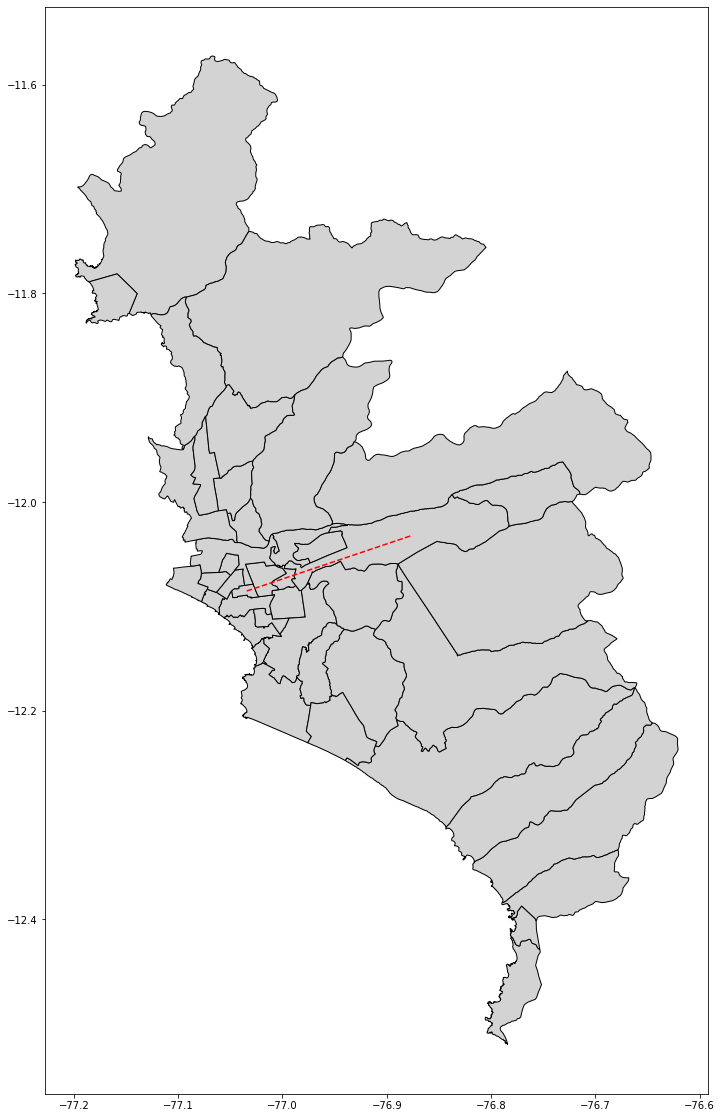

In [70]:
# Add line that cross Lince and ATE

ate_lince = LineString(zip((ate_point.x , lc_point.x ), (ate_point.y, lc_point.y)))

fig, ax = plt.subplots(figsize=(20,20))
base_lima.plot(color='lightgray', ax=ax, linestyle='-',
                                    edgecolor='black')

gpd.GeoSeries([ate_lince]).plot(color='red', linestyle='--', ax = ax)

In [71]:
base_lima['area']=base_lima.area
base_lima

UBIGEO  \
Distrito                          
LURIN                    150119   
ANCON                    150102   
SAN ISIDRO               150131   
MAGDALENA DEL MAR        150120   
SAN BORJA                150130   
LINCE                    150116   
SANTIAGO DE SURCO        150140   
PUEBLO LIBRE             150121   
SANTA ROSA               150139   
CARABAYLLO               150106   
JESUS MARIA              150113   
PUCUSANA                 150124   
SANTA MARIA DEL MAR      150138   
CHORRILLOS               150108   
BARRANCO                 150104   
VILLA MARIA DEL TRIUNFO  150143   
SAN JUAN DE MIRAFLORES   150133   
MIRAFLORES               150122   
SURQUILLO                150141   
PUNTA NEGRA              150127   
SAN LUIS                 150134   
SAN MIGUEL               150136   
VILLA EL SALVADOR        150142   
PUNTA HERMOSA            150126   
SAN BARTOLO              150129   
PACHACAMAC               150123   
LA VICTORIA              150115   
LA MOLINA                150114   
BRE<d1>A                 150105   
SANTA ANITA              150137   
CIENEGUILLA              150109   
LIMA                     150101   
EL AGUSTINO              150111   
RIMAC                    150128   
ATE                      150103   
CHACLACAYO               150107   
INDEPENDENCIA            150112   
SAN MARTIN DE PORRES     150135   
LOS OLIVOS               150117   
COMAS                    150110   
LURIGANCHO               150118   
SAN JUAN DE LURIGANCHO   150132   
PUENTE PIEDRA            150125   

                                                                  geometry  \
Distrito                                                                     
LURIN                    POLYGON ((-76.70549 -12.17672, -76.70429 -12.1...   
ANCON                    POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...   
SAN ISIDRO               POLYGON ((-77.04859 -12.08504, -77.04762 -12.0...   
MAGDALENA DEL MAR        POLYGON ((-77.07210 -12.08358, -77.06348 -12.0...   
SAN BORJA                POLYGON ((-76.98732 -12.07994, -76.98425 -12.0...   
LINCE                    POLYGON ((-77.02807 -12.07871, -77.02435 -12.0...   
SANTIAGO DE SURCO        POLYGON ((-76.95923 -12.07576, -76.95831 -12.0...   
PUEBLO LIBRE             POLYGON ((-77.04966 -12.07025, -77.05097 -12.0...   
SANTA ROSA               POLYGON ((-77.14355 -11.79587, -77.14061 -11.7...   
CARABAYLLO               POLYGON ((-76.89995 -11.72979, -76.89921 -11.7...   
JESUS MARIA              POLYGON ((-77.03811 -12.06768, -77.03629 -12.0...   
PUCUSANA                 POLYGON ((-76.77367 -12.42553, -76.77332 -12.4...   
SANTA MARIA DEL MAR      MULTIPOLYGON (((-76.78117 -12.40917, -76.78144...   
CHORRILLOS               POLYGON ((-77.00745 -12.16033, -77.00781 -12.1...   
BARRANCO                 POLYGON ((-77.01945 -12.13060, -77.01915 -12.1...   
VILLA MARIA DEL TRIUNFO  POLYGON ((-76.91078 -12.12233, -76.91191 -12.1...   
SAN JUAN DE MIRAFLORES   POLYGON ((-76.95434 -12.11556, -76.95416 -12.1...   
MIRAFLORES               POLYGON ((-77.02656 -12.10820, -77.02631 -12.1...   
SURQUILLO                POLYGON ((-77.01498 -12.10778, -77.01469 -12.1...   
PUNTA NEGRA              POLYGON ((-76.64078 -12.21377, -76.64000 -12.2...   
SAN LUIS                 POLYGON ((-76.99780 -12.06084, -76.99810 -12.0...   
SAN MIGUEL               POLYGON ((-77.07857 -12.06228, -77.07815 -12.0...   
VILLA EL SALVADOR        POLYGON ((-76.94232 -12.18247, -76.93731 -12.1...   
PUNTA HERMOSA            POLYGON ((-76.65267 -12.19256, -76.65207 -12.1...   
SAN BARTOLO              POLYGON ((-76.67773 -12.33800, -76.67787 -12.3...   
PACHACAMAC               POLYGON ((-76.88134 -12.07220, -76.86137 -12.1...   
LA VICTORIA              POLYGON ((-77.01661 -12.05889, -77.01559 -12.0...   
LA MOLINA                POLYGON ((-76.94006 -12.06405, -76.93942 -12.0...   
BRE<d1>A                 POLYGON ((-77.04206 -12.05348, -77.04198 -12.0...   
SANTA ANITA              POLYGO

In [72]:
#Distamce between San Juan de Lurigancho to other districs 

SJL_point = base_lima['centroid']["SAN JUAN DE LURIGANCHO"]
    
base_lima['distance'] = base_lima['centroid'].distance(SJL_point)

In [73]:
base_lima['distance'].sort_values(ascending=False)

Distrito
PUCUSANA                   0.555547
SANTA MARIA DEL MAR        0.505632
SAN BARTOLO                0.490367
PUNTA NEGRA                0.443395
PUNTA HERMOSA              0.395445
LURIN                      0.334878
VILLA EL SALVADOR          0.274567
ANCON                      0.273336
PACHACAMAC                 0.268347
CHORRILLOS                 0.249065
SANTA ROSA                 0.237993
CIENEGUILLA                0.233781
VILLA MARIA DEL TRIUNFO    0.230486
SAN JUAN DE MIRAFLORES     0.211952
CHACLACAYO                 0.209580
BARRANCO                   0.204123
MIRAFLORES                 0.184133
SANTIAGO DE SURCO          0.181479
SAN MIGUEL                 0.176307
MAGDALENA DEL MAR          0.175867
SURQUILLO                  0.172533
LURIGANCHO                 0.170624
SAN ISIDRO                 0.166317
PUEBLO LIBRE               0.159857
LINCE                      0.153848
SAN BORJA                  0.153424
JESUS MARIA                0.152794
LA MOLINA          

<AxesSubplot:xlabel='Distrito'>

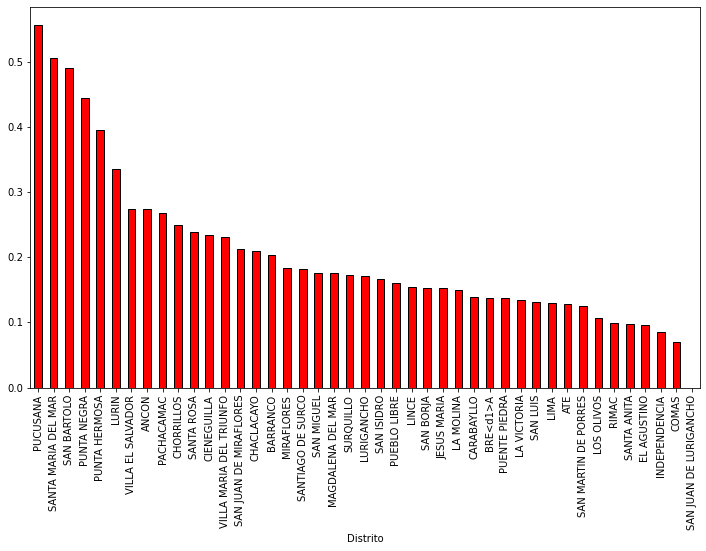

In [74]:

base_lima['distance'].sort_values(ascending=False).plot.bar(figsize=(12, 7), color = 'red', edgecolor='black')

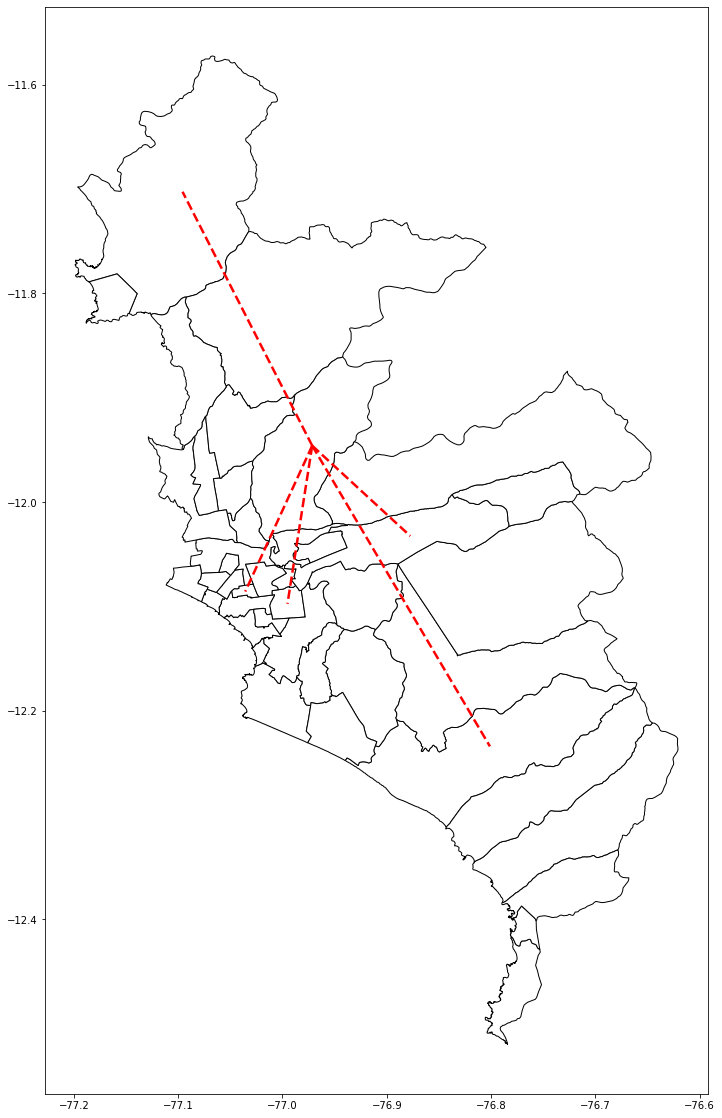

In [75]:
# SJL and other districs 

d1 = LineString(zip((SJL_point.x , lc_point.x ), (SJL_point.y, lc_point.y)))
d2 = LineString(zip((SJL_point.x , ate_point.x ), (SJL_point.y, ate_point.y)))
d3 = LineString(zip((SJL_point.x , sb_point.x ), (SJL_point.y, sb_point.y)))
d4 = LineString(zip((SJL_point.x , lr_point.x ), (SJL_point.y, lr_point.y)))
d5 = LineString(zip((SJL_point.x , ac_point.x ), (SJL_point.y, ac_point.y)))

fig, ax = plt.subplots(figsize=(20,20))
base_lima.plot(color='white', ax=ax, linestyle='-',
                                    edgecolor='black')

for i in range(1,6):
    gpd.GeoSeries(globals()[f'd{i}']).plot(color='red', linestyle='--', ax = ax, linewidth = 2.5)



## ArcGis Operations in Geopandas

In [77]:
dist_shp = gpd.read_file(r'../data/geopandas_data/shape_file/DISTRITOS.shp')

In [78]:
dist_shp

IDDPTO DEPARTAMEN IDPROV      PROVINCIA  IDDIST                DISTRITO  \
0        10    HUANUCO   1009    PUERTO INCA  100902         CODO DEL POZUZO   
1        10    HUANUCO   1009    PUERTO INCA  100904             TOURNAVISTA   
2        25    UCAYALI   2503     PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3        25    UCAYALI   2503     PADRE ABAD  250302                 IRAZOLA   
4        25    UCAYALI   2503     PADRE ABAD  250304                 NESHUYA   
...     ...        ...    ...            ...     ...                     ...   
1868     10    HUANUCO   1006  LEONCIO PRADO  100608         CASTILLO GRANDE   
1869     10    HUANUCO   1006  LEONCIO PRADO  100609            PUEBLO NUEVO   
1870     10    HUANUCO   1006  LEONCIO PRADO  100610   SANTO DOMINGO DE ANDA   
1871     21       PUNO   2111      SAN ROMAN  211105              SAN MIGUEL   
1872     15       LIMA   1508         HUAURA  150806                  HUAURA   

                     CAPITAL CODCCPP  AREA FUENTE  \
0            CODO DEL POZUZO    0001     1   INEI   
1                TOURNAVISTA    0001     1   INEI   
2     ALEXANDER VON HUMBOLDT    0001     1   INEI   
3              SAN ALEJANDRO    0001     1   INEI   
4               MONTE ALEGRE    0001     1   INEI   
...                      ...     ...   ...    ...   
1868         CASTILLO GRANDE    0001     1   INEI   
1869            PUEBLO NUEVO    0001     1   INEI   
1870                   PACAE    0001     1   INEI   
1871              SAN MIGUEL    0001     1   INEI   
1872                  HUAURA    0001     1   INEI   

                                               geometry  
0     POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...  
1     POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...  
2     POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...  
3     POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...  
4     POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...  
...                                                 ...  
1868  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...  
1869  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...  
1870  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...  
1871  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...  
1872  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...  

[1873 rows x 11 columns]

### Get Centroids
Get the centroids of each geometry (district).

In [79]:
dist_shp.centroid

0        POINT (-75.46654 -9.63436)
1        POINT (-74.86638 -9.00132)
2        POINT (-75.04802 -8.82493)
3        POINT (-75.27992 -8.95052)
4        POINT (-75.04903 -8.64130)
                   ...             
1868     POINT (-76.03798 -9.20808)
1869     POINT (-76.00137 -9.08220)
1870     POINT (-75.98297 -8.98490)
1871    POINT (-70.12642 -15.40623)
1872    POINT (-77.44523 -11.00358)
Length: 1873, dtype: geometry

In [80]:
dist_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Proyecting from epsg = 4326  to bidimensional  epsg = 24891

We get warnings since we need to reproject this shapefile object to a CRS in meters. This CRS should be a plane area to the specific zone of the shapefile ([more info](https://stackoverflow.com/questions/63004400/getting-a-userwarning-when-calculating-centroid-of-a-geoseries)). In the case of Peru, we use 24891 ([more info](https://epsg.io/24891)).



In [81]:
projected_dist_shp = dist_shp.to_crs( epsg = 24891 ) # proyectar de un sistema a otro

projected_dist_shp[ 'centroids'] = projected_dist_shp.centroid

In [82]:
projected_dist_shp

IDDPTO DEPARTAMEN IDPROV      PROVINCIA  IDDIST                DISTRITO  \
0        10    HUANUCO   1009    PUERTO INCA  100902         CODO DEL POZUZO   
1        10    HUANUCO   1009    PUERTO INCA  100904             TOURNAVISTA   
2        25    UCAYALI   2503     PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3        25    UCAYALI   2503     PADRE ABAD  250302                 IRAZOLA   
4        25    UCAYALI   2503     PADRE ABAD  250304                 NESHUYA   
...     ...        ...    ...            ...     ...                     ...   
1868     10    HUANUCO   1006  LEONCIO PRADO  100608         CASTILLO GRANDE   
1869     10    HUANUCO   1006  LEONCIO PRADO  100609            PUEBLO NUEVO   
1870     10    HUANUCO   1006  LEONCIO PRADO  100610   SANTO DOMINGO DE ANDA   
1871     21       PUNO   2111      SAN ROMAN  211105              SAN MIGUEL   
1872     15       LIMA   1508         HUAURA  150806                  HUAURA   

                     CAPITAL CODCCPP  AREA FUENTE  \
0            CODO DEL POZUZO    0001     1   INEI   
1                TOURNAVISTA    0001     1   INEI   
2     ALEXANDER VON HUMBOLDT    0001     1   INEI   
3              SAN ALEJANDRO    0001     1   INEI   
4               MONTE ALEGRE    0001     1   INEI   
...                      ...     ...   ...    ...   
1868         CASTILLO GRANDE    0001     1   INEI   
1869            PUEBLO NUEVO    0001     1   INEI   
1870                   PACAE    0001     1   INEI   
1871              SAN MIGUEL    0001     1   INEI   
1872                  HUAURA    0001     1   INEI   

                                               geometry  \
0     POLYGON ((792235.754 1058662.347, 792327.434 1...   
1     POLYGON ((867740.531 1109984.864, 867841.276 1...   
2     POLYGON ((825748.095 1119633.083, 825731.782 1...   
3     POLYGON ((813192.985 1139230.779, 813086.669 1...   
4     POLYGON ((826952.810 1152450.269, 826956.415 1...   
...                                                 ...   
1868  POLYGON ((708380.294 1078114.102, 708442.915 1...   
1869  POLYGON ((729774.604 1091282.765, 729853.346 1...   
1870  POLYGON ((727394.419 1104973.482, 727348.314 1...   
1871  POLYGON ((1340704.908 367948.610, 1341610.110 ...   
1872  POLYGON ((563851.048 883898.400, 563879.036 88...   

                           centroids  
0     POINT (775320.257 1021274.832)  
1     POINT (842576.001 1090558.701)  
2     POINT (822798.003 1110455.875)  
3     POINT (796991.687 1096893.382)  
4     POINT (822981.599 1130853.269)  
...                              ...  
1868  POINT (712995.257 1069415.818)  
1869  POINT (717207.630 1083325.838)  
1870  POINT (719368.451 1094094.498)  
1871  POINT (1340922.141 359793.457)  
1872   POINT (556189.059 872210.495)  

[1873 rows x 12 columns]

Then, we reproject again the centroids to the original CRS.

In [83]:
dist_shp[ 'Centroid_Latitude' ] = projected_dist_shp[ 'centroids' ].to_crs( epsg = 4326 ).y
dist_shp[ 'Centroid_Longitude' ] = projected_dist_shp[ 'centroids' ].to_crs( epsg = 4326 ).x

## Intersection

In [84]:
health_centers = pd.read_csv( r"../data/geopandas_data/salud_places_peru.csv")

In [85]:
ht1 = health_centers[ health_centers.latitud != 0 ]

In [86]:
# Make ht1 a geopandas
ht1_geo = gpd.GeoDataFrame( ht1 , 
                           geometry= gpd.points_from_xy( 
                                      ht1.longitud, 
                                      ht1.latitud))

Check CRS

We found that geolocation is recognized by google maps. We set the CRS that correspond to google maps.

In [87]:
ht1_geo_crs = ht1_geo.set_crs( epsg = 4326 )

Find Ubigeo for each point

In [88]:
# Just take 10% of observations
ht2_geo = ht1_geo_crs.sample( frac = 0.10 )

In [89]:
# Just take 10% of observations
ht2_geo

id_eess  codigo_renaes categoria                                nombre  \
24921    26512          26602        SD                       MEGALENS OPTICA   
7106      7134           7133       I-1                            VILLAPAMPA   
28249     7101          30105        SD                           GWA MEDICAL   
26822    10988          28599       I-2                        DR. LUIS QUITO   
28418     4286          30309       I-3                POLICLINICO SAN MARTIN   
...        ...            ...       ...                                   ...   
113      12719            114       I-1                                HUANTA   
25231    11774          26938       I-2  CONSULTORIO MEDICO MAPFRE SEDE SURCO   
25552    22694          27269       I-2                  CENTRO MEDICO MILIAN   
5917     10091           5921       I-3                          ANCIETA BAJA   
28150    23569          29999       I-3           MAFAISA & SALUD VIAL S.A.C.   

                 diresa                         red  \
24921            LORETO  NO PERTENECE A NINGUNA RED   
7106       HUANCAVELICA                HUANCAVELICA   
28249            CALLAO  NO PERTENECE A NINGUNA RED   
26822    LIMA DIRIS SUR  NO PERTENECE A NINGUNA RED   
28418   LIMA DIRIS ESTE  NO PERTENECE A NINGUNA RED   
...                 ...                         ...   
113              LORETO              RAMON CASTILLA   
25231    LIMA DIRIS SUR  NO PERTENECE A NINGUNA RED   
25552         CAJAMARCA  NO PERTENECE A NINGUNA RED   
5917    LIMA DIRIS ESTE  NO PERTENECE A NINGUNA RED   
28150  LIMA DIRIS NORTE  NO PERTENECE A NINGUNA RED   

                                               direccion   longitud  \
24921  JIRÓN ABTAO N?ERO 245 DISTRITO BELEN PROVINCIA... -73.249589   
7106   AVENIDA AV. HIPODROMO S/N - VILLAPAMPA S/N AV.... -74.798241   
28249  CALLE LAS TURMALINAS MANZANA 7 LOTE P8 URBANIZ... -77.110687   
26822  OTROS Sector 03, Grupo 31, Mz C3, Lote 16 DIST... -76.934778   
28418  JIRÓN LAS ALONDRAS NÚMERO 375 MANZANA B1 LOTE ... -76.961712   
...                                                  ...        ...   
113    OTROS ACTUALIZAR DISTRITO PEBAS PROVINCIA MARI... -72.051000   
25231  AVENIDA CAMINOS DEL INCA N° 238 (OF. 103) - N°... -76.992361   
25552  JIRÓN JUAN UGAZ NÚMERO SIN NUMERO PISO 1 DISTR... -78.935542   
5917   OTROS AGRUPACION FAMILIAR LOS JARDINES - EX AN... -77.007416   
28150  AVENIDA UNIVERSITARIA NÚMERO 3851 PISO 2 MANZA... -77.081549   

         latitud  id_ubigeo                     geometry  
24921  -3.759267       1462   POINT (-73.24959 -3.75927)  
7106  -12.844599        825  POINT (-74.79824 -12.84460)  
28249 -12.069550        693  POINT (-77.11069 -12.06955)  
26822 -12.231416       1322  POINT (-76.93478 -12.23142)  
28418 -12.053200       1317  POINT (-76.96171 -12.05320)  
...          ...        ...                          ...  
113    -3.486668       1476   POINT (-72.05100 -3.48667)  
25231 -12.113788       1320  POINT (-76.99236 -12.11379)  
25552  -6.624738        679   POINT (-78.93554 -6.62474)  
5917  -12.031874       1291  POINT (-77.00742 -12.03187)  
28150 -11.989105       1315  POINT (-77.08155 -11.98910)  

[1545 rows x 11 columns]

## Aggregation

We have shapefiles at district levels. It is possible to aggregate districts at Department or Province level.

<AxesSubplot:>

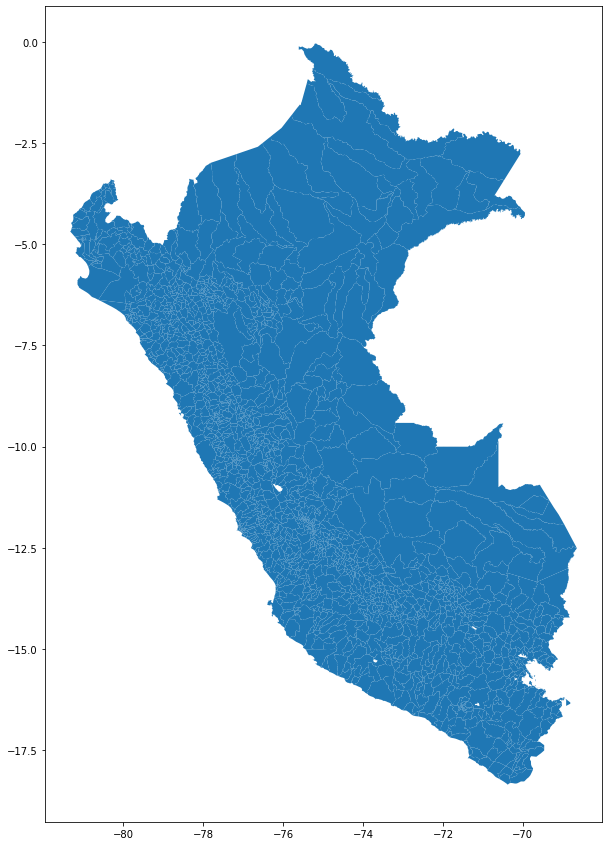

In [90]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dist_shp.plot( ax = ax )

In [91]:
prov_shp = dist_shp.dissolve( by = 'IDPROV' )

<AxesSubplot:>

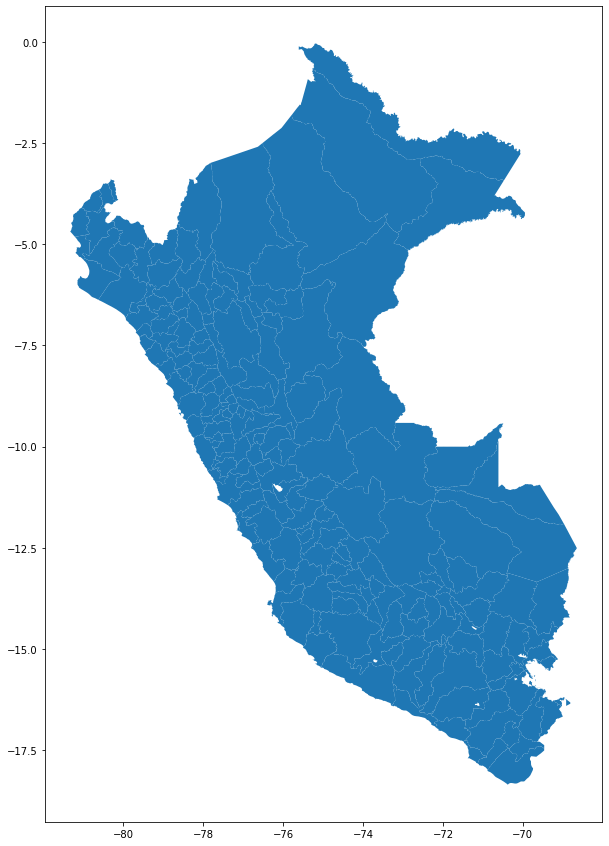

In [92]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
prov_shp .plot( ax = ax )

In [93]:
dpt_shp = dist_shp.dissolve( by = 'IDDPTO' )

<AxesSubplot:>

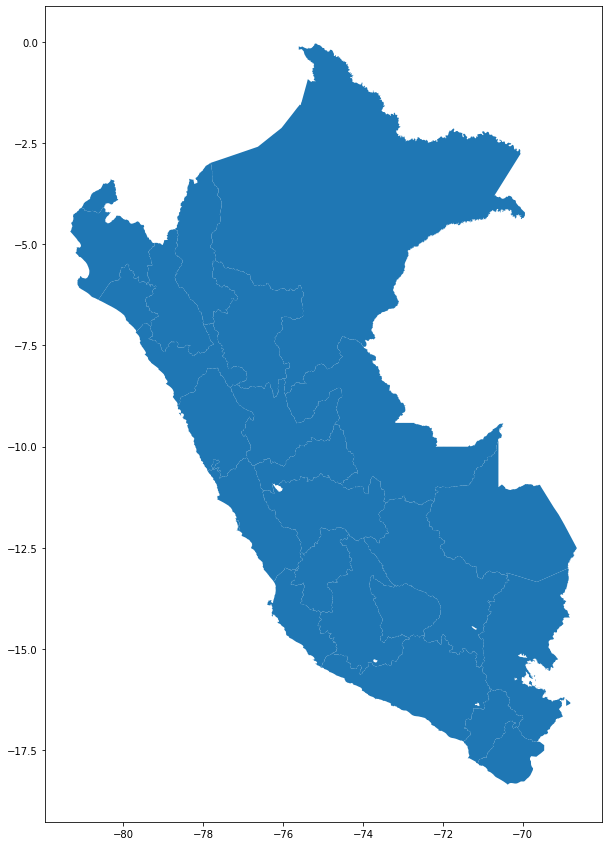

In [94]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dpt_shp.plot( ax = ax )

## Checking CRS

In [96]:
# Border of Switzerland
ch_borders = gpd.read_file( r'../data/geopandas_data/eu_maps/CHE_adm0.shp')

# Border of Germany
de_borders = gpd.read_file( r'../data/geopandas_data/eu_maps/gadm36_DEU_0.shp')

# Switzerland lakes shape files
ch_lakes = gpd.GeoDataFrame.from_file( r'../data/geopandas_data/eu_maps/g2s15.shp')

# muni
Geo_muni = gpd.read_file( r"../data/geopandas_data/eu_maps/VG250_GEM.shp" )

In [97]:
ch_borders

ID_0  ISO   NAME_ENGLI     NAME_ISO     NAME_FAO               NAME_LOCAL  \
0   223  CHE  Switzerland  SWITZERLAND  Switzerland  Schweiz|Suisse|Svizzera   

  NAME_OBSOL                                         NAME_VARIA NAME_NONLA  \
0       None  Schweiz|Svizzera|Svizra|Swiss Confederation|Co...       None   

  NAME_FRENC  ... CARICOM   EU  CAN  ACP Landlocked AOSIS SIDS Islands  LDC  \
0     Suisse  ...     0.0  0.0  0.0  0.0        1.0   0.0  0.0     0.0  0.0   

                                            geometry  
0  MULTIPOLYGON (((10.22766 46.61207, 10.22734 46...  

[1 rows x 68 columns]

Plots with different CRS

(-46058.36469219931, 967356.691928138, -305024.0777151486, 6406513.607306512)

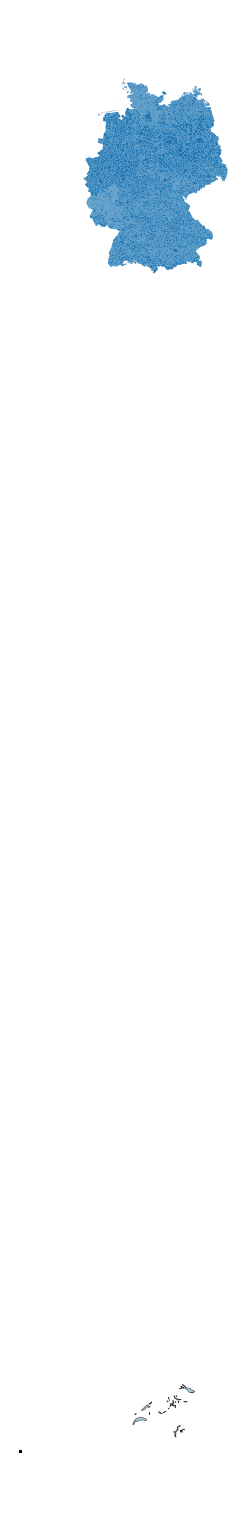

In [98]:

fig = plt.figure(figsize=(40, 20), dpi=100)
ax = fig.add_subplot(111, frame_on = False )

# German Plot
Geo_muni.plot( ax = ax )

# switzerland borders
ch_borders.geometry.boundary.plot(color = 'black', ax=ax, edgecolor='0.2', linewidth=1.5) 

# # Swiss lakes
ch_lakes.plot(color='lightblue' , ax=ax, edgecolor='0.2', linewidth=0.4, legend=True)

ax.axis('off')



### Check CRS

In [99]:
shp_files = [ ch_borders, de_borders, ch_lakes, Geo_muni ]

In [100]:
for shp in shp_files:
    print( shp.crs )

epsg:4326
epsg:4326
epsg:21781
epsg:25832


### Reproject CRS

In [101]:
Geo_muni_crs = Geo_muni.to_crs( 21781 )

In [102]:
ch_borders_crs = ch_borders.to_crs( 21781 )

(453126.0049465788, 1163640.4776774019, 11798.918320549732, 1157415.473468453)

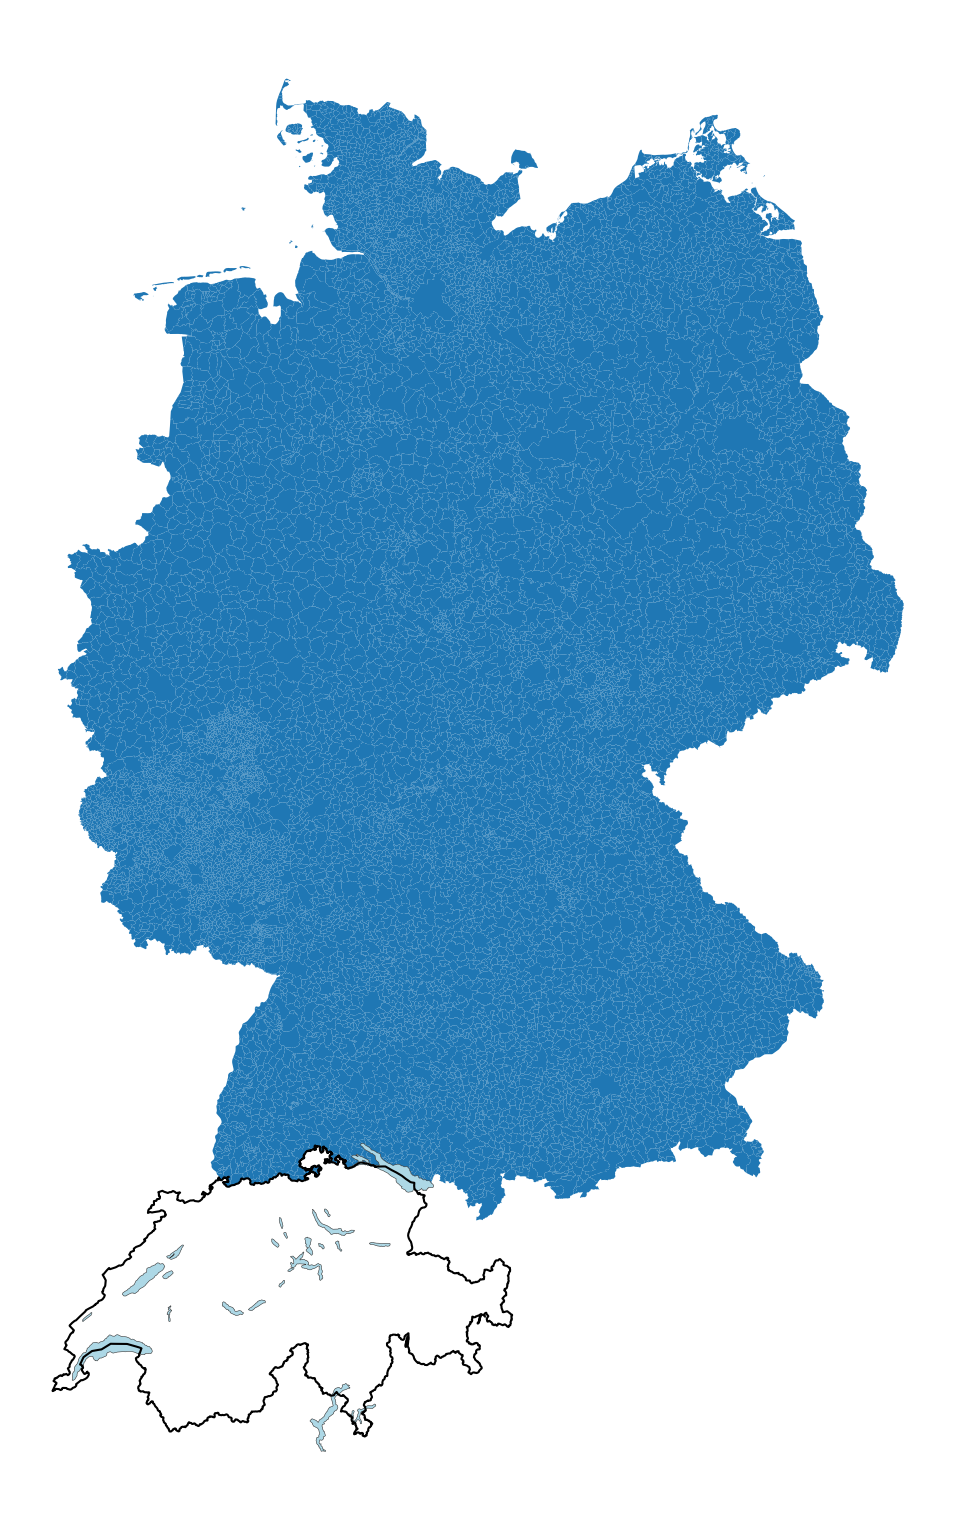

In [103]:

fig = plt.figure(figsize=(40, 20), dpi=100)
ax = fig.add_subplot(111, frame_on = False )

# German Plot
Geo_muni_crs.plot( ax = ax )

# switzerland borders
ch_borders_crs.geometry.boundary.plot(color = 'black', ax=ax, edgecolor='0.2', linewidth=1.5) 

# # Swiss lakes
ch_lakes.plot(color='lightblue' , ax=ax, edgecolor='0.2', linewidth=0.4, legend=True)

ax.axis('off')



## References:


### Geopandas
https://geopandas.org/en/stable/docs/user_guide/set_operations.html

https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html

https://geopandas.org/en/stable/docs/user_guide/data_structures.html

https://www.kaggle.com/imdevskp/geopandas

### Coordinate Reference System

https://geopandas.org/en/stable/docs/user_guide/projections.html

#### Types of projections

https://spatialreference.org/

#### Universal Transverse Mercator (UTM)

https://manifold.net/doc/mfd9/universal_transverse_mercator_projection.htm

